# Enhancing Physical Activity Monitoring with Colibri Wireless Unit

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm

The 9 DAT files that contain all the data for the 9 subjects, will be read and concatenated into one DataFrame called "df":

In [2]:

files = ["subject101.dat", "subject102.dat", "subject103.dat", "subject104.dat", "subject105.dat", "subject106.dat",
         "subject107.dat", "subject108.dat", "subject109.dat"]

titles = ["timestamp (s)", "activityID", "heart rate (bpm)", "Hand temperature (°C)",
          "Hand 3D-acceleration data (ms-2) X", "Hand 3D-acceleration data (ms-2) Y",
          "Hand 3D-acceleration data (ms-2) Z", "Hand 3D-acceleration data (ms-2) X*",
          "Hand 3D-acceleration data (ms-2) Y*", "Hand 3D-acceleration data (ms-2) Z*",
          "Hand 3D-gyroscope data (rad/s) X", "Hand 3D-gyroscope data (rad/s) Y",
          "Hand 3D-gyroscope data (rad/s) Z", "Hand 3D-magnetometer data (μT) X",
          "Hand 3D-magnetometer data (μT) Y", "Hand 3D-magnetometer data (μT) Z",
          "Hand orientation 1", "Hand orientation 2", "Hand orientation 3", "Hand orientation 4",
          "Chest temperature (°C) ", "Chest 3D-acceleration data (ms-2) X",
          "Chest 3D-acceleration data (ms-2) Y", "Chest 3D-acceleration data (ms-2) Z",
          "Chest 3D-acceleration data (ms-2) X*", "Chest 3D-acceleration data (ms-2) Y*",
          "Chest 3D-acceleration data (ms-2) Z*", "Chest 3D-gyroscope data (rad/s) X",
          "Chest 3D-gyroscope data (rad/s) Y", "Chest 3D-gyroscope data (rad/s) Z",
          "Chest 3D-magnetometer data (μT) X", "Chest 3D-magnetometer data (μT) Y",
          "Chest 3D-magnetometer data (μT) Z", "Chest orientation 1", "Chest orientation 2",
          "Chest orientation 3", "Chest orientation 4", "Ankle temperature (°C)",
          "Ankle 3D-acceleration data (ms-2) X", "Ankle 3D-acceleration data (ms-2) Y",
          "Ankle 3D-acceleration data (ms-2) Z", "Ankle 3D-acceleration data (ms-2) X*",
          "Ankle 3D-acceleration data (ms-2) Y*", "Ankle 3D-acceleration data (ms-2) Z*",
          "Ankle 3D-gyroscope data (rad/s) X", "Ankle 3D-gyroscope data (rad/s) Y",
          "Ankle 3D-gyroscope data (rad/s) Z", "Ankle 3D-magnetometer data (μT) X",
          "Ankle 3D-magnetometer data (μT) Y", "Ankle 3D-magnetometer data (μT) Z",
          "Ankle orientation 1", "Ankle orientation 2", "Ankle orientation 3", "Ankle orientation 4"]

dfs = []

for file, subject_number in zip(files, range(101, 110)):
    new_df = pd.read_csv(file, header=None, delimiter=' ')
    
    new_df.columns = titles
    
    dfs.append(new_df)

df = pd.concat(dfs, ignore_index=True) 
df.head(10)

,timestamp (s),activityID,heart rate (bpm),Hand temperature (°C),Hand 3D-acceleration data (ms-2) X,Hand 3D-acceleration data (ms-2) Y,Hand 3D-acceleration data (ms-2) Z,Hand 3D-acceleration data (ms-2) X*,Hand 3D-acceleration data (ms-2) Y*,Hand 3D-acceleration data (ms-2) Z*,...,Ankle 3D-gyroscope data (rad/s) X,Ankle 3D-gyroscope data (rad/s) Y,Ankle 3D-gyroscope data (rad/s) Z,Ankle 3D-magnetometer data (μT) X,Ankle 3D-magnetometer data (μT) Y,Ankle 3D-magnetometer data (μT) Z,Ankle orientation 1,Ankle orientation 2,Ankle orientation 3,Ankle orientation 4
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0
5,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.006089,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0
6,8.44,0,NaN,30.0,2.33738,8.82900,3.54767,2.27703,8.77828,3.73230,...,-0.031973,-0.053934,0.015594,-60.6307,-38.8676,-58.2711,1.0,0.0,0.0,0.0
7,8.45,0,NaN,30.0,2.37142,9.05500,3.39347,2.39786,8.89814,3.64131,...,-0.019643,-0.039937,-0.000785,-60.5171,-38.9819,-58.2733,1.0,0.0,0.0,0.0
8,8.46,0,NaN,30.0,2.33951,9.13251,3.54668,2.44371,8.98841,3.62596,...,0.013747,-0.010042,0.017701,-61.2916,-39.6182,-58.1499,1.0,0.0,0.0,0.0
9,8.47,0,NaN,30.0,2.25966,9.09415,3.43015,2.42877,9.01871,3.61081,...,0.007649,-0.013923,0.014498,-60.8509,-39.0821,-58.1478,1.0,0.0,0.0,0.0


In [3]:
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 2872533
Number of columns: 54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 54 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   timestamp (s)                         float64
 1   activityID                            int64  
 2   heart rate (bpm)                      float64
 3   Hand temperature (°C)                 float64
 4   Hand 3D-acceleration data (ms-2) X    float64
 5   Hand 3D-acceleration data (ms-2) Y    float64
 6   Hand 3D-acceleration data (ms-2) Z    float64
 7   Hand 3D-acceleration data (ms-2) X*   float64
 8   Hand 3D-acceleration data (ms-2) Y*   float64
 9   Hand 3D-acceleration data (ms-2) Z*   float64
 10  Hand 3D-gyroscope data (rad/s) X      float64
 11  Hand 3D-gyroscope data (rad/s) Y      float64
 12  Hand 3D-gyroscope data (rad/s) Z      float64
 13  Hand 3D-magnetometer data (μT) X      float64
 14  Hand 3D-magnetometer data (μT) Y      float64
 15  Hand 3D-magneto

The 6 optional activities will be merged with the main activities for their respective subjects, and the DataFrame will be updated to include all data sheets; the optional ones, combined with the main data:

In [5]:
file_pairs = [
    ('subject101.dat', 'subject101optional.dat', 'combined_subject101.dat'),
    ('subject105.dat', 'subject105optional.dat', 'combined_subject105.dat'),
    ('subject106.dat', 'subject106optional.dat', 'combined_subject106.dat'),
    ('subject108.dat', 'subject108optional.dat', 'combined_subject108.dat'),
    ('subject109.dat', 'subject109optional.dat', 'combined_subject109.dat')
]

for file1, file2, output_file_name in file_pairs:
    with open(file1, 'r') as f1, open(file2, 'r') as f2:
        merged_contents = f1.read() + f2.read()
    
    with open(output_file_name, 'w') as output_file:
        output_file.write(merged_contents)
        
files = [
    "combined_subject101.dat", "subject102.dat", "subject103.dat", "subject104.dat",
    "combined_subject105.dat", "combined_subject106.dat", "subject107.dat",
    "combined_subject108.dat", "combined_subject109.dat"
]

titles = [ "timestamp (s)", "activityID", "heart rate (bpm)", "Hand temperature (°C)",
          "Hand 3D-acceleration data (ms-2) X", "Hand 3D-acceleration data (ms-2) Y",
          "Hand 3D-acceleration data (ms-2) Z", "Hand 3D-acceleration data (ms-2) X*",
          "Hand 3D-acceleration data (ms-2) Y*", "Hand 3D-acceleration data (ms-2) Z*",
          "Hand 3D-gyroscope data (rad/s) X", "Hand 3D-gyroscope data (rad/s) Y",
          "Hand 3D-gyroscope data (rad/s) Z", "Hand 3D-magnetometer data (μT) X",
          "Hand 3D-magnetometer data (μT) Y", "Hand 3D-magnetometer data (μT) Z",
          "Hand orientation 1", "Hand orientation 2", "Hand orientation 3", "Hand orientation 4",
          "Chest temperature (°C) ", "Chest 3D-acceleration data (ms-2) X",
          "Chest 3D-acceleration data (ms-2) Y", "Chest 3D-acceleration data (ms-2) Z",
          "Chest 3D-acceleration data (ms-2) X*", "Chest 3D-acceleration data (ms-2) Y*",
          "Chest 3D-acceleration data (ms-2) Z*", "Chest 3D-gyroscope data (rad/s) X",
          "Chest 3D-gyroscope data (rad/s) Y", "Chest 3D-gyroscope data (rad/s) Z",
          "Chest 3D-magnetometer data (μT) X", "Chest 3D-magnetometer data (μT) Y",
          "Chest 3D-magnetometer data (μT) Z", "Chest orientation 1", "Chest orientation 2",
          "Chest orientation 3", "Chest orientation 4", "Ankle temperature (°C)",
          "Ankle 3D-acceleration data (ms-2) X", "Ankle 3D-acceleration data (ms-2) Y",
          "Ankle 3D-acceleration data (ms-2) Z", "Ankle 3D-acceleration data (ms-2) X*",
          "Ankle 3D-acceleration data (ms-2) Y*", "Ankle 3D-acceleration data (ms-2) Z*",
          "Ankle 3D-gyroscope data (rad/s) X", "Ankle 3D-gyroscope data (rad/s) Y",
          "Ankle 3D-gyroscope data (rad/s) Z", "Ankle 3D-magnetometer data (μT) X",
          "Ankle 3D-magnetometer data (μT) Y", "Ankle 3D-magnetometer data (μT) Z",
          "Ankle orientation 1", "Ankle orientation 2", "Ankle orientation 3", "Ankle orientation 4"]

dfs = []

for file, subject_number in zip(files, range(101, 110)):
    new_df = pd.read_csv(file, header=None, delimiter=' ')

    new_df.columns = titles

    dfs.append(new_df)

df = pd.concat(dfs, ignore_index=True) 

df.head(10)

,timestamp (s),activityID,heart rate (bpm),Hand temperature (°C),Hand 3D-acceleration data (ms-2) X,Hand 3D-acceleration data (ms-2) Y,Hand 3D-acceleration data (ms-2) Z,Hand 3D-acceleration data (ms-2) X*,Hand 3D-acceleration data (ms-2) Y*,Hand 3D-acceleration data (ms-2) Z*,...,Ankle 3D-gyroscope data (rad/s) X,Ankle 3D-gyroscope data (rad/s) Y,Ankle 3D-gyroscope data (rad/s) Z,Ankle 3D-magnetometer data (μT) X,Ankle 3D-magnetometer data (μT) Y,Ankle 3D-magnetometer data (μT) Z,Ankle orientation 1,Ankle orientation 2,Ankle orientation 3,Ankle orientation 4
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0
5,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.006089,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0
6,8.44,0,NaN,30.0,2.33738,8.82900,3.54767,2.27703,8.77828,3.73230,...,-0.031973,-0.053934,0.015594,-60.6307,-38.8676,-58.2711,1.0,0.0,0.0,0.0
7,8.45,0,NaN,30.0,2.37142,9.05500,3.39347,2.39786,8.89814,3.64131,...,-0.019643,-0.039937,-0.000785,-60.5171,-38.9819,-58.2733,1.0,0.0,0.0,0.0
8,8.46,0,NaN,30.0,2.33951,9.13251,3.54668,2.44371,8.98841,3.62596,...,0.013747,-0.010042,0.017701,-61.2916,-39.6182,-58.1499,1.0,0.0,0.0,0.0
9,8.47,0,NaN,30.0,2.25966,9.09415,3.43015,2.42877,9.01871,3.61081,...,0.007649,-0.013923,0.014498,-60.8509,-39.0821,-58.1478,1.0,0.0,0.0,0.0


In [6]:
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 3850505
Number of columns: 54


## Work plan:
The use of BMI (Body Mass Index) in such activity monitoring devices will be investigated.
BMI is an easy, low-cost way to estimate body fat using just height and weight. It is accurate when appropriately measured. A high BMI often means more body fat and higher health risks. It helps screen for obesity and related health issues. Also, its extended use provides valuable data for comparing populations over time and regions. BMI is calculated by dividing an individual’s weight in kilograms by the square of their height in meters.




In order to start the investigation with BMI, the new columns: subjectID, gender, age (years), weight (KGs), height(cm), activity duration, BMI and weight ranges will be Introduced:
- BMI stands for Body Mass Index and it is a person’s weight in kilograms divided by the square of height in meters, and it is calculated using this formula: weight (kg) / [height (m)]^2 

- Weight ranges will be specified into 4 catigories: "Underweight", "Healthy", "Overweight" and "Obese": 

 1) If BMI is less than 18.5 =  Underweight.
 2) If BMI is between 18.5 to <25 = Healthy.
 3) If BMI is between  25.0 to <30 = Overweight.
 4) If BMI is 30.0 or higher = Obese.

In [7]:
files = ["combined_subject101.dat", "subject102.dat","subject103.dat", "subject104.dat","combined_subject105.dat", "combined_subject106.dat",
         "subject107.dat", "combined_subject108.dat","combined_subject109.dat"]

titles = ["subjectID", "gender","age (years)","weight (KGs)","height (cm)","timestamp (s)", "activityID", "heart rate (bpm)", "Hand temperature (°C)",
          "Hand 3D-acceleration data (ms-2) X", "Hand 3D-acceleration data (ms-2) Y",
          "Hand 3D-acceleration data (ms-2) Z", "Hand 3D-acceleration data (ms-2) X*",
          "Hand 3D-acceleration data (ms-2) Y*", "Hand 3D-acceleration data (ms-2) Z*",
          "Hand 3D-gyroscope data (rad/s) X", "Hand 3D-gyroscope data (rad/s) Y",
          "Hand 3D-gyroscope data (rad/s) Z", "Hand 3D-magnetometer data (μT) X",
          "Hand 3D-magnetometer data (μT) Y", "Hand 3D-magnetometer data (μT) Z",
          "Hand orientation 1", "Hand orientation 2", "Hand orientation 3", "Hand orientation 4",
          "Chest temperature (°C)", "Chest 3D-acceleration data (ms-2) X",
          "Chest 3D-acceleration data (ms-2) Y", "Chest 3D-acceleration data (ms-2) Z",
          "Chest 3D-acceleration data (ms-2) X*", "Chest 3D-acceleration data (ms-2) Y*",
          "Chest 3D-acceleration data (ms-2) Z*", "Chest 3D-gyroscope data (rad/s) X",
          "Chest 3D-gyroscope data (rad/s) Y", "Chest 3D-gyroscope data (rad/s) Z",
          "Chest 3D-magnetometer data (μT) X", "Chest 3D-magnetometer data (μT) Y",
          "Chest 3D-magnetometer data (μT) Z", "Chest orientation 1", "Chest orientation 2",
          "Chest orientation 3", "Chest orientation 4", "Ankle temperature (°C)",
          "Ankle 3D-acceleration data (ms-2) X", "Ankle 3D-acceleration data (ms-2) Y",
          "Ankle 3D-acceleration data (ms-2) Z", "Ankle 3D-acceleration data (ms-2) X*",
          "Ankle 3D-acceleration data (ms-2) Y*", "Ankle 3D-acceleration data (ms-2) Z*",
          "Ankle 3D-gyroscope data (rad/s) X", "Ankle 3D-gyroscope data (rad/s) Y",
          "Ankle 3D-gyroscope data (rad/s) Z", "Ankle 3D-magnetometer data (μT) X",
          "Ankle 3D-magnetometer data (μT) Y", "Ankle 3D-magnetometer data (μT) Z",
          "Ankle orientation 1", "Ankle orientation 2", "Ankle orientation 3", "Ankle orientation 4"]

dfs = []

for file, subject_number in zip(files, range(101, 110)):
    new_df = pd.read_csv(file, header=None, delimiter=' ')

    new_df.insert(0, "subjectID", subject_number)

    gender = 'M' if subject_number in [101, 103, 104, 105, 106, 107, 108, 109] else 'F'
    new_df.insert(1, "gender", gender)

    age_dict = {101: 27, 102: 25, 103: 31, 104: 24, 105: 26, 106: 26, 107: 23, 108: 32, 109: 31}
    weight_dict = {101: 83, 102: 78, 103: 92, 104: 95, 105: 73, 106: 69, 107: 86, 108: 87, 109: 54}
    height_dict = {101: 182, 102: 169, 103: 187, 104: 194, 105: 180, 106: 183, 107: 173, 108: 179, 109: 168}

    new_df.insert(2, "age (years)", age_dict.get(subject_number, None))
    new_df.insert(3, "weight (KGs)", weight_dict.get(subject_number, None))

    new_df.insert(4, "height (m)", height_dict.get(subject_number, None))
    new_df["BMI"] = new_df["weight (KGs)"] / ((new_df["height (m)"] / 100) ** 2) 

    new_df.columns = titles + ["BMI"]  

    dfs.append(new_df) 

df = pd.concat(dfs, ignore_index=True) 

df['timestamp (s)'] = pd.to_numeric(df['timestamp (s)'], errors='coerce')
df['activity duration'] = df.groupby(['subjectID', 'activityID'])['timestamp (s)'].transform(lambda x: x.max() - x.min())

def get_weight_range(bmi):

    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['weight range'] = df['BMI'].apply(get_weight_range)

df.head(10)

,subjectID,gender,age (years),weight (KGs),height (cm),timestamp (s),activityID,heart rate (bpm),Hand temperature (°C),Hand 3D-acceleration data (ms-2) X,...,Ankle 3D-magnetometer data (μT) X,Ankle 3D-magnetometer data (μT) Y,Ankle 3D-magnetometer data (μT) Z,Ankle orientation 1,Ankle orientation 2,Ankle orientation 3,Ankle orientation 4,BMI,activity duration,weight range
0,101,M,27,83,182,8.38,0,104.0,30.0,2.37223,...,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight
1,101,M,27,83,182,8.39,0,NaN,30.0,2.18837,...,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight
2,101,M,27,83,182,8.40,0,NaN,30.0,2.37357,...,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight
3,101,M,27,83,182,8.41,0,NaN,30.0,2.07473,...,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight
4,101,M,27,83,182,8.42,0,NaN,30.0,2.22936,...,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight
5,101,M,27,83,182,8.43,0,NaN,30.0,2.29959,...,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight
6,101,M,27,83,182,8.44,0,NaN,30.0,2.33738,...,-60.6307,-38.8676,-58.2711,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight
7,101,M,27,83,182,8.45,0,NaN,30.0,2.37142,...,-60.5171,-38.9819,-58.2733,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight
8,101,M,27,83,182,8.46,0,NaN,30.0,2.33951,...,-61.2916,-39.6182,-58.1499,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight
9,101,M,27,83,182,8.47,0,NaN,30.0,2.25966,...,-60.8509,-39.0821,-58.1478,1.0,0.0,0.0,0.0,25.05736,3764.16,Overweight


*After assigning genders to each subject, it is noticed that there is only one female in the study compared to eight males.*

The guidelines specify that activities with ID = zero, should not be used, so those will be removed.
As per the report for this assignment: data labelled with activityID=0 should be discarded in any kind of analysis. This data mainly covers transient activities between performing different activities. Also, different parts of one subject's recording (in the case when the data collection was aborted for some reason) was put together during these transient activities, so those will be removed.

In [8]:
df = df[df['activityID'] != 0]
df.head()

,subjectID,gender,age (years),weight (KGs),height (cm),timestamp (s),activityID,heart rate (bpm),Hand temperature (°C),Hand 3D-acceleration data (ms-2) X,...,Ankle 3D-magnetometer data (μT) X,Ankle 3D-magnetometer data (μT) Y,Ankle 3D-magnetometer data (μT) Z,Ankle orientation 1,Ankle orientation 2,Ankle orientation 3,Ankle orientation 4,BMI,activity duration,weight range
2928,101,M,27,83,182,37.66,1,NaN,30.375,2.21530,...,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2929,101,M,27,83,182,37.67,1,NaN,30.375,2.29196,...,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2930,101,M,27,83,182,37.68,1,NaN,30.375,2.29090,...,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2931,101,M,27,83,182,37.69,1,NaN,30.375,2.21800,...,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2932,101,M,27,83,182,37.70,1,100.0,30.375,2.30106,...,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight


In [9]:
df['heart rate (bpm)'] = df['heart rate (bpm)'].fillna(method='ffill')

df['heart rate (bpm)'] = df['heart rate (bpm)'].fillna(method='bfill')

df.head(10)

,subjectID,gender,age (years),weight (KGs),height (cm),timestamp (s),activityID,heart rate (bpm),Hand temperature (°C),Hand 3D-acceleration data (ms-2) X,...,Ankle 3D-magnetometer data (μT) X,Ankle 3D-magnetometer data (μT) Y,Ankle 3D-magnetometer data (μT) Z,Ankle orientation 1,Ankle orientation 2,Ankle orientation 3,Ankle orientation 4,BMI,activity duration,weight range
2928,101,M,27,83,182,37.66,1,100.0,30.375,2.21530,...,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2929,101,M,27,83,182,37.67,1,100.0,30.375,2.29196,...,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2930,101,M,27,83,182,37.68,1,100.0,30.375,2.29090,...,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2931,101,M,27,83,182,37.69,1,100.0,30.375,2.21800,...,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2932,101,M,27,83,182,37.70,1,100.0,30.375,2.30106,...,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2933,101,M,27,83,182,37.71,1,100.0,30.375,2.07165,...,-61.3257,-36.9744,-57.7501,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2934,101,M,27,83,182,37.72,1,100.0,30.375,2.41148,...,-61.5520,-36.9632,-57.9957,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2935,101,M,27,83,182,37.73,1,100.0,30.375,2.32815,...,-61.5738,-36.1724,-59.3487,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2936,101,M,27,83,182,37.74,1,100.0,30.375,2.25096,...,-61.7741,-37.1744,-58.1199,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2937,101,M,27,83,182,37.75,1,100.0,30.375,2.14107,...,-60.7680,-37.4206,-58.8735,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight


In [11]:
nan_indexes = df[df.isnull().any(axis=1)].index
df.drop(nan_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

,subjectID,gender,age (years),weight (KGs),height (cm),timestamp (s),activityID,heart rate (bpm),Hand temperature (°C),Hand 3D-acceleration data (ms-2) X,...,Ankle 3D-magnetometer data (μT) X,Ankle 3D-magnetometer data (μT) Y,Ankle 3D-magnetometer data (μT) Z,Ankle orientation 1,Ankle orientation 2,Ankle orientation 3,Ankle orientation 4,BMI,activity duration,weight range
0,101,M,27,83,182,37.66,1,100.0,30.375,2.21530,...,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
1,101,M,27,83,182,37.67,1,100.0,30.375,2.29196,...,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
2,101,M,27,83,182,37.68,1,100.0,30.375,2.29090,...,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
3,101,M,27,83,182,37.69,1,100.0,30.375,2.21800,...,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight
4,101,M,27,83,182,37.70,1,100.0,30.375,2.30106,...,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,25.05736,271.86,Overweight


Any dublicates in the data will be cheked, and removed if existent: 

In [12]:
duplicated = df.duplicated().sum()
duplicated

0

In [13]:
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 2701010
Number of columns: 62


Mentioned in the report: the second accelerometer readings (columns) are not reliable in this data collection because it gets saturated sometimes, so they will be removed and the analysis will continue using the data from the first accelerometer:

In [14]:
columns_to_remove = ["Hand 3D-acceleration data (ms-2) X*", "Hand 3D-acceleration data (ms-2) Y*", "Hand 3D-acceleration data (ms-2) Z*",
                   "Chest 3D-acceleration data (ms-2) X*", "Chest 3D-acceleration data (ms-2) Y*", "Chest 3D-acceleration data (ms-2) Z*",
                    "Ankle 3D-acceleration data (ms-2) X*", "Ankle 3D-acceleration data (ms-2) Y*", "Ankle 3D-acceleration data (ms-2) Z*"]

for column in columns_to_remove:
    if column in df.columns:
        df.drop(column, axis=1, inplace=True)

Also, mentioned in the report that the Orientation columns are invalid in this data collection, so these will be removed as well:

In [15]:
columns_to_remove = ["Hand orientation 1", "Hand orientation 2", "Hand orientation 3", "Hand orientation 4",
                   "Chest orientation 1", "Chest orientation 2", "Chest orientation 3", "Chest orientation 4",
                    "Ankle orientation 1", "Ankle orientation 2", "Ankle orientation 3", "Ankle orientation 4"]
for column in columns_to_remove:
    if column in df.columns:
        df.drop(column, axis=1, inplace=True)

In [16]:
num_rows, num_columns = df.shape

# Print the dimensions
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 2701010
Number of columns: 41


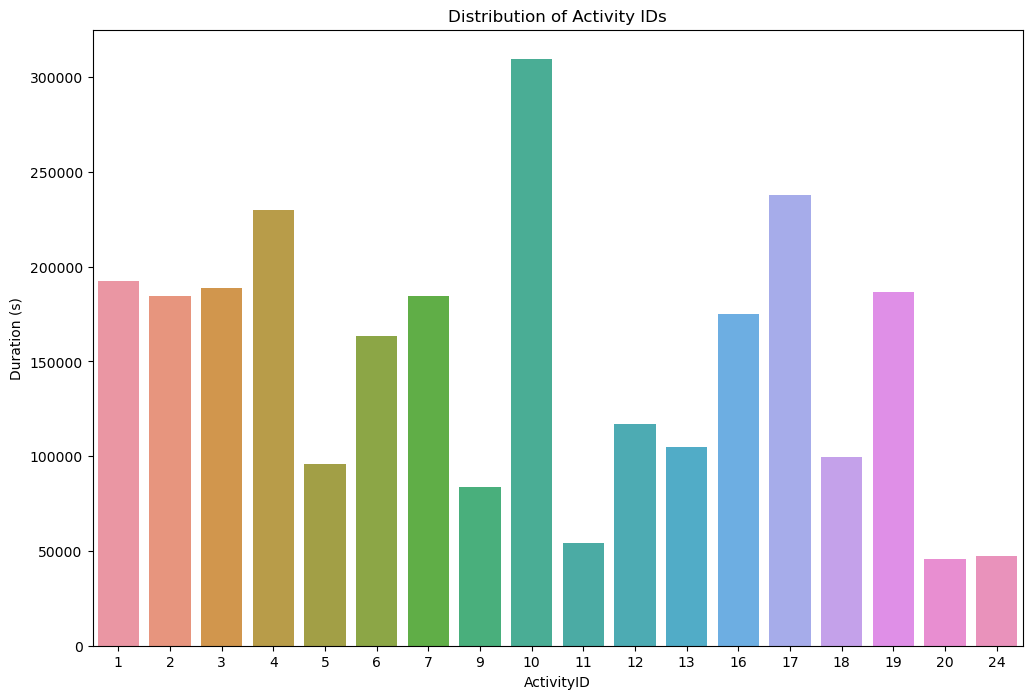

In [17]:
basic_stats = df.describe()

activity_counts = df['activityID'].value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(x='activityID', data=df)
plt.title('Distribution of Activity IDs')
plt.xlabel('ActivityID')
plt.ylabel('Duration (s)')
plt.show()

*Based on the bar chart provided, the activities associated with activityID 20 and 24, representing playing soccer and rope jumping, were performed the least in the study, even though they are the most physically demanding among the activities included. In contrast, activities 10 and 17, which represent computer work and ironing, were the most frequently performed activities, despite requiring minimal physical effort compared to playing soccer and rope jumping.*

A plot will be generated to visually represent the Body Mass Index (BMI) values for individuals (labeled as SubjectID) in the dataset: 

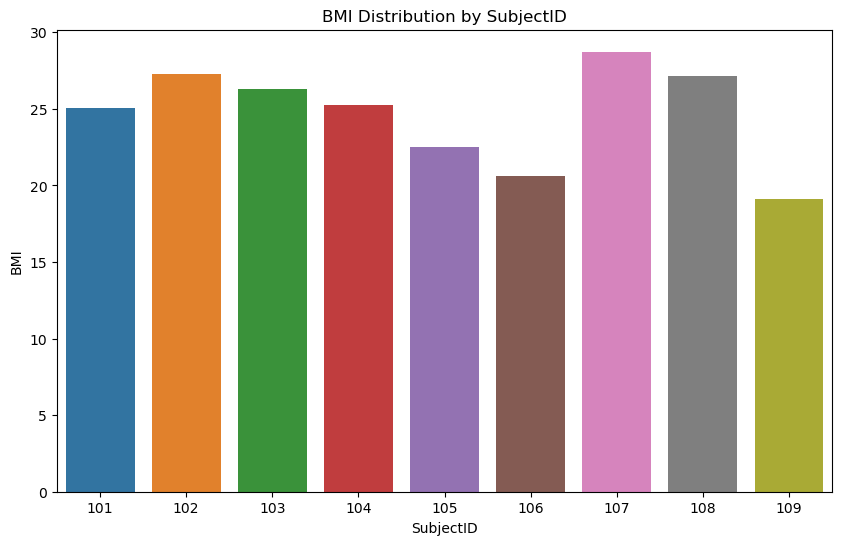

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='subjectID', y='BMI', data=df)
plt.title('BMI Distribution by SubjectID')
plt.xlabel('SubjectID')
plt.ylabel('BMI')
plt.show()

To back up the plot above, another one will be created to show where individuals fall in terms of their weight ranges:

In [19]:
weight_range_counts = df.groupby('weight range')['subjectID'].nunique() # Group by 'weight range' and count the 'subjectID's for each weight range

for weight_range, count in weight_range_counts.items():
    print(f"Number of subjects in the '{weight_range}' weight range: {count}") # Printing the number of subjects in each weight range

Number of subjects in the 'Healthy' weight range: 3
Number of subjects in the 'Overweight' weight range: 6


*From the analysis above, non of the subjects fall in the "Underweight" or "Obese" weight ranges.*

A chart will be generated to compare the activity durations across subjects and to break down these durations by the type of activity in the dataset:

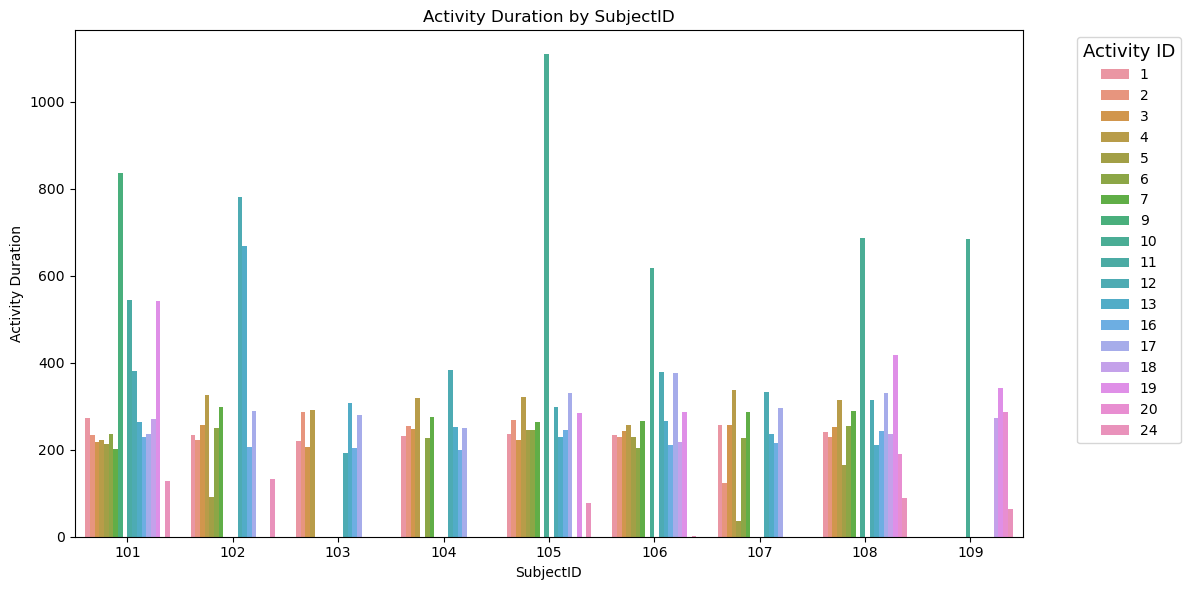

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='subjectID', y='activity duration', hue='activityID', data=df)
plt.title('Activity Duration by SubjectID')
plt.xlabel('SubjectID')
plt.ylabel('Activity Duration')
plt.legend(title='Activity ID', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  
plt.tight_layout()  
plt.show()

*The graph shows that not all the subjects performed all the activities.*

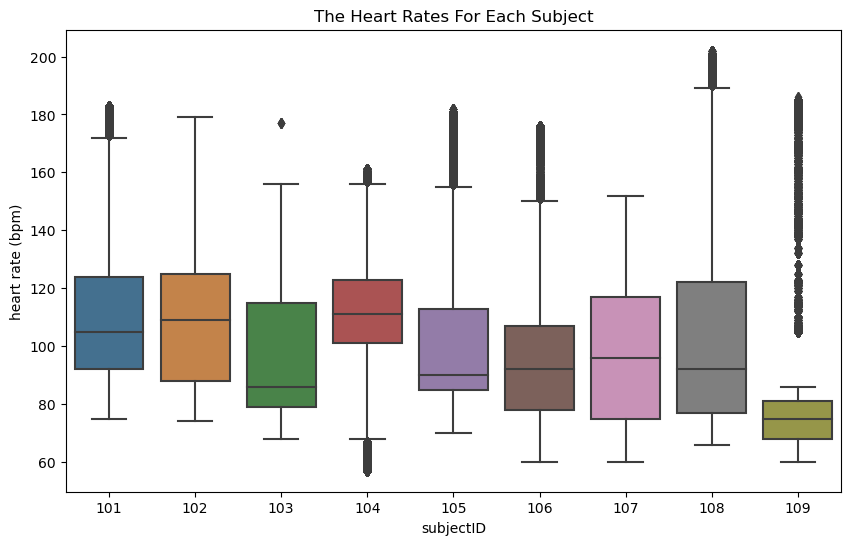

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='subjectID', y='heart rate (bpm)', data=df, saturation=0.5, whis=1.5)
plt.title("The Heart Rates For Each Subject")
plt.show()

*The box-and-whisker plot above shows that some subjects were involved more in hectic activities, and others were mostly in almost resting mood when evaluated by thier avarage heart rate throughout the study.*

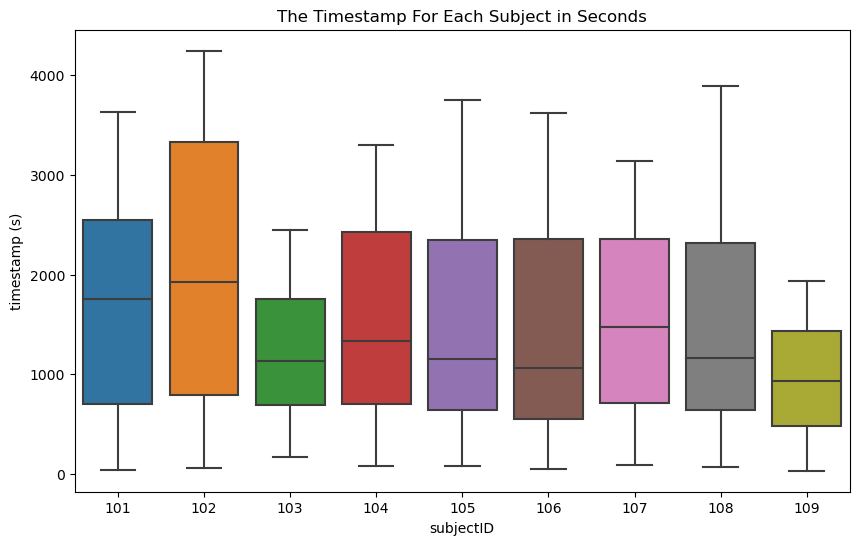

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='subjectID', y='timestamp (s)', data=df)
plt.title("The Timestamp For Each Subject in Seconds")
plt.show()

*The box-and-whisker plot above shows that some subjects spent less time doing the activities (in a tighter timeframe) compared to others who spent more time performing them. But generally speaking, the subjects almost spent the same amount of time doing activities for this study.*

The original DataFrame will be split into 2: one containing all the lines with subjects in the weight ranges "Underweight" and "Healthy" that will be called "df1", and the other with subjects in the weight ranges "Overweight" and "Obese" that will be called "df2":

In [23]:
df1 = df[(df['weight range'] == 'Underweight') | (df['weight range'] == 'Healthy')]
df2 = df[(df['weight range'] == 'Overweight') | (df['weight range'] == 'Obese')]

df1.reset_index(drop=True, inplace=True) 

df2.reset_index(drop=True, inplace=True) 

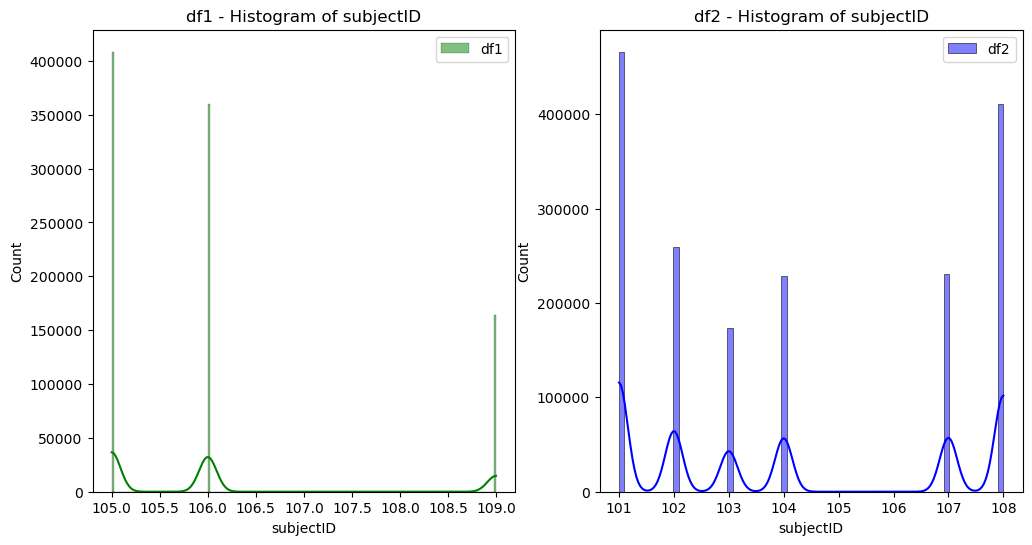

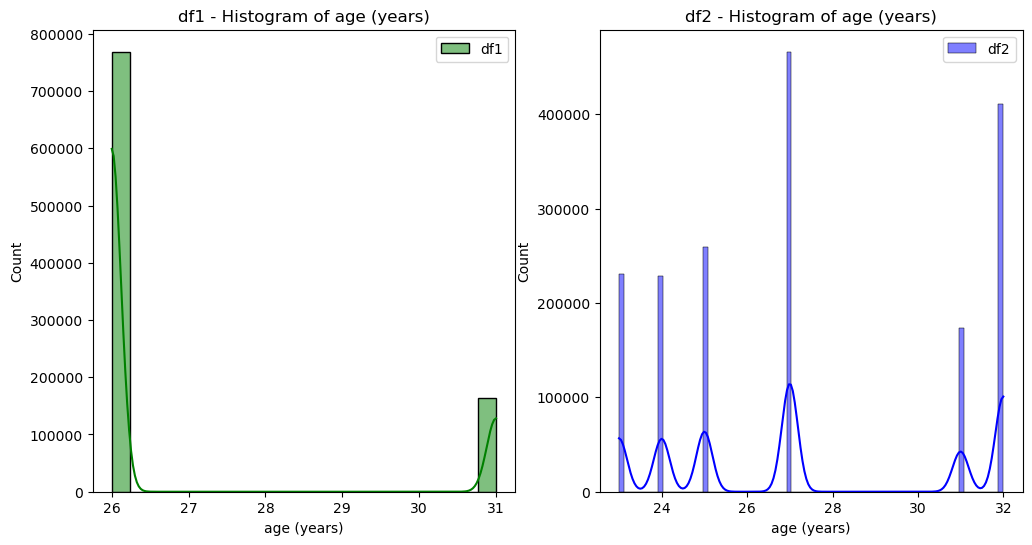

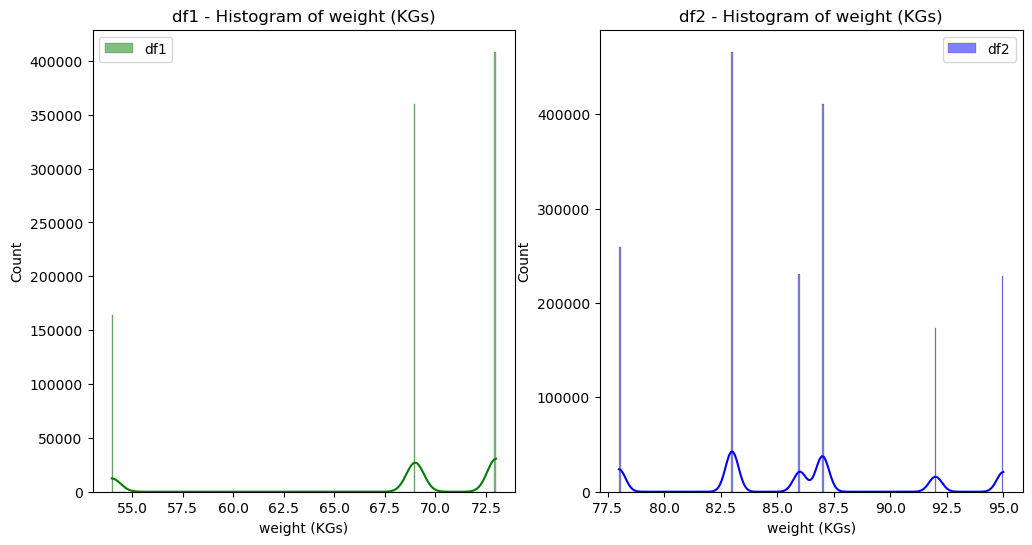

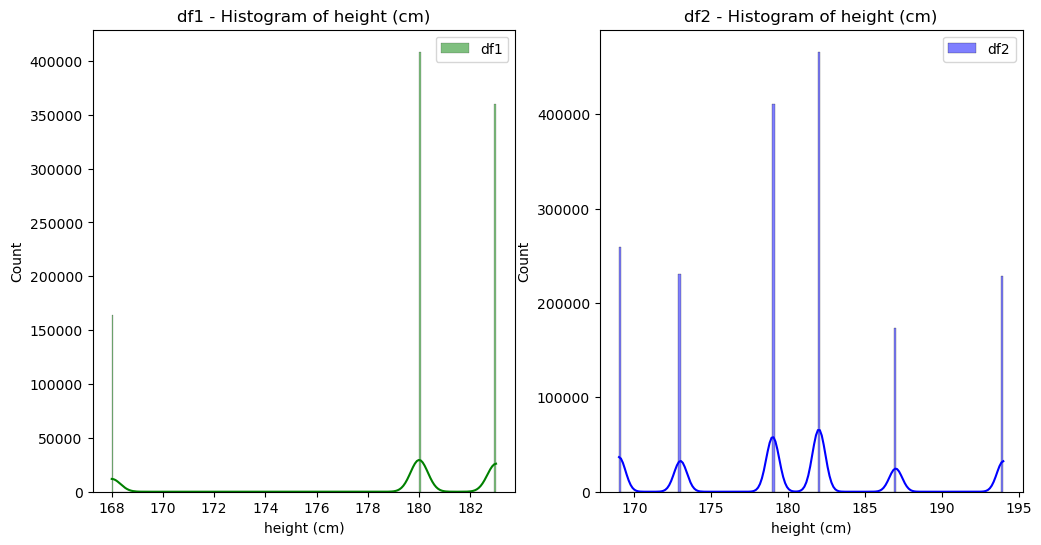

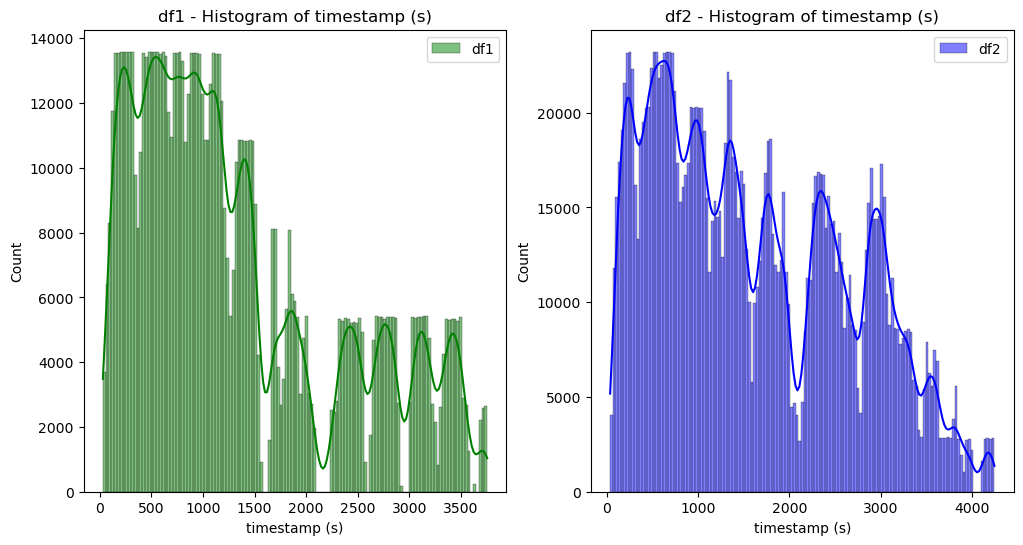

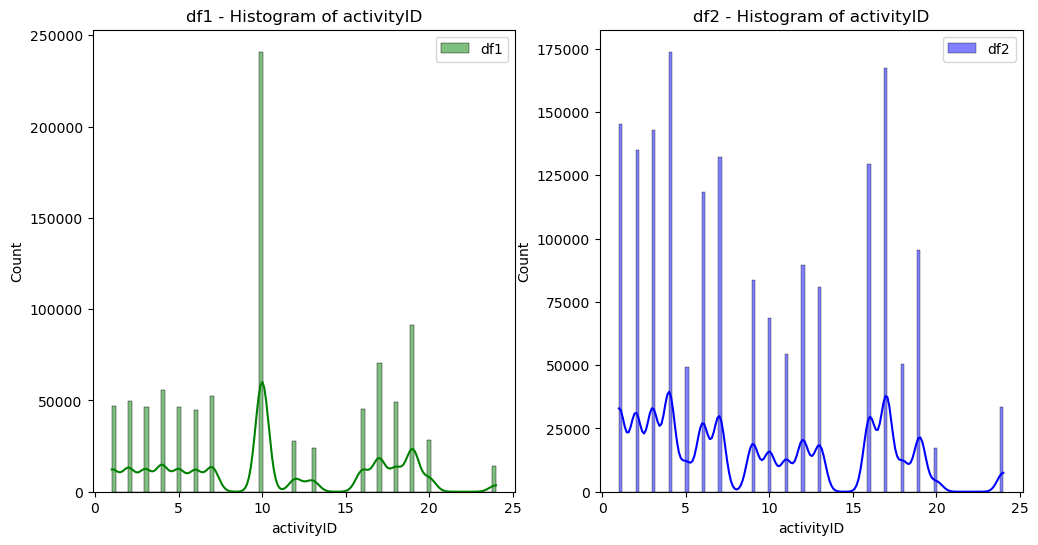

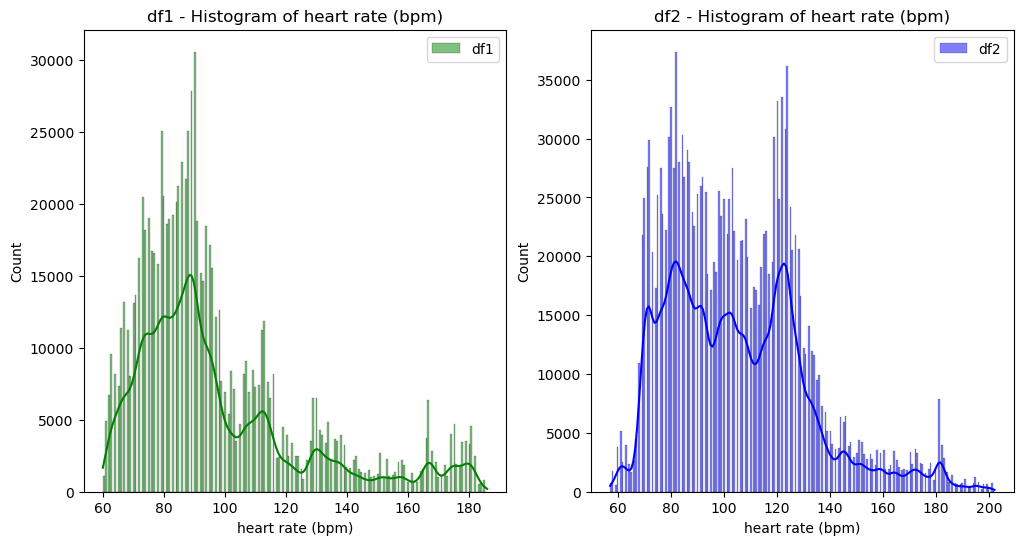

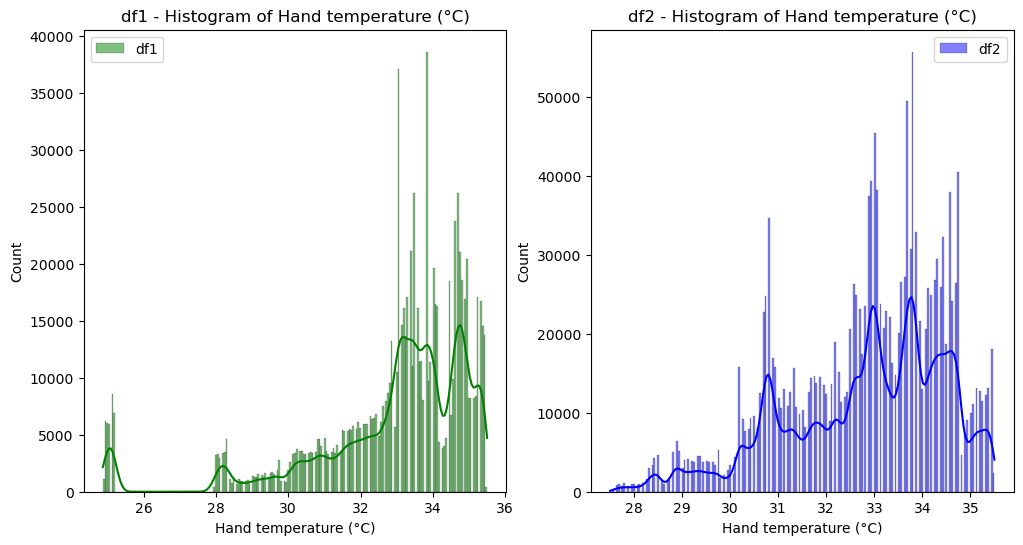

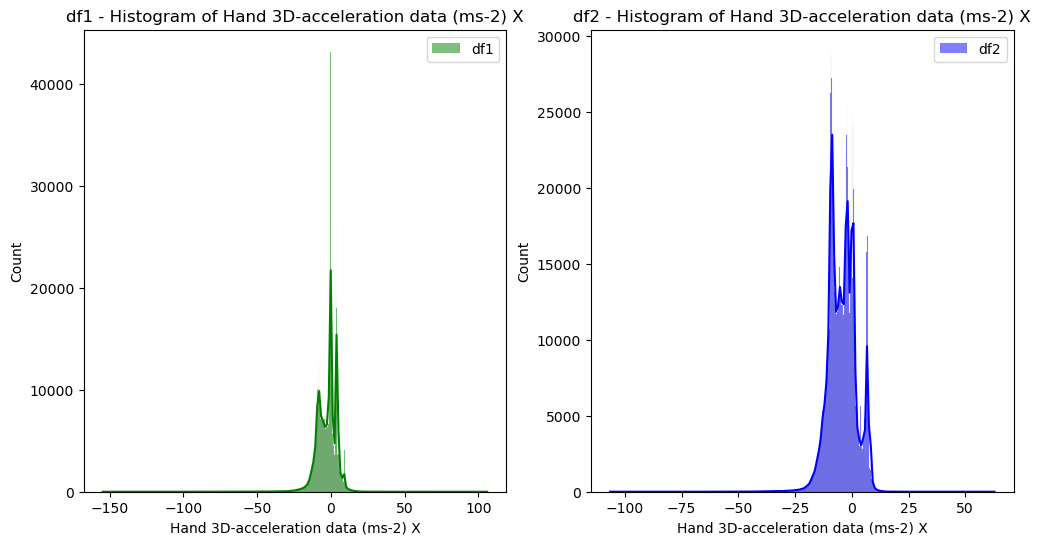

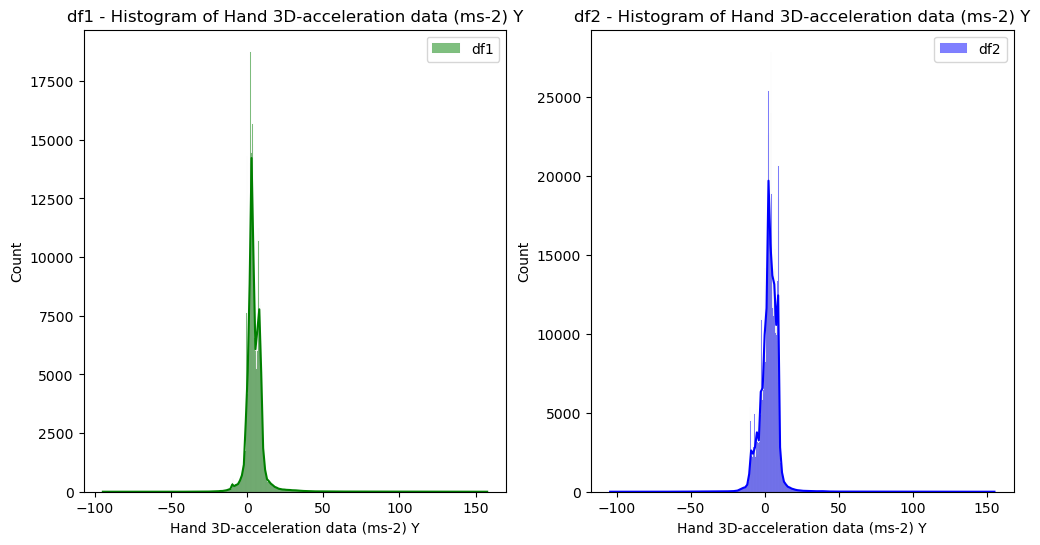

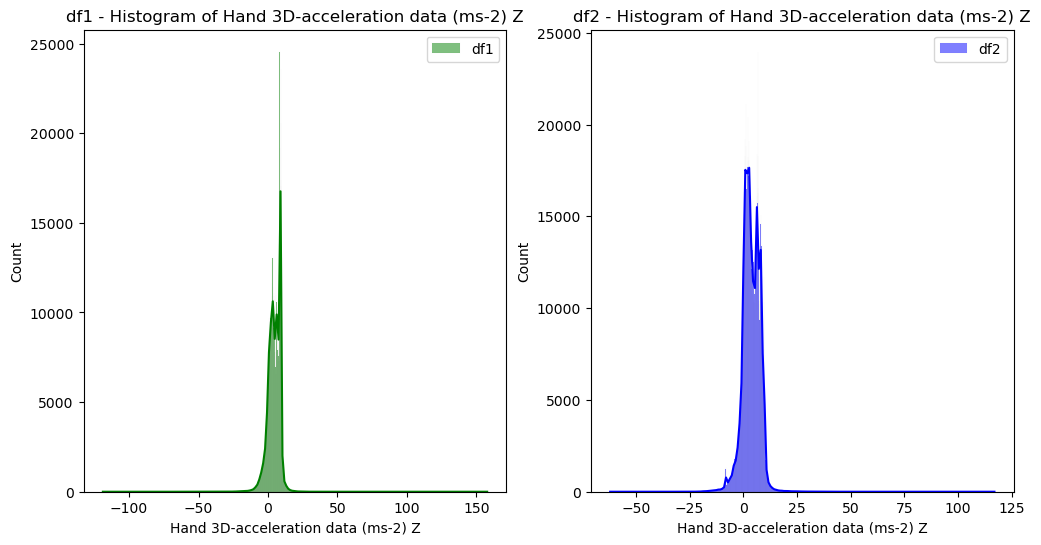

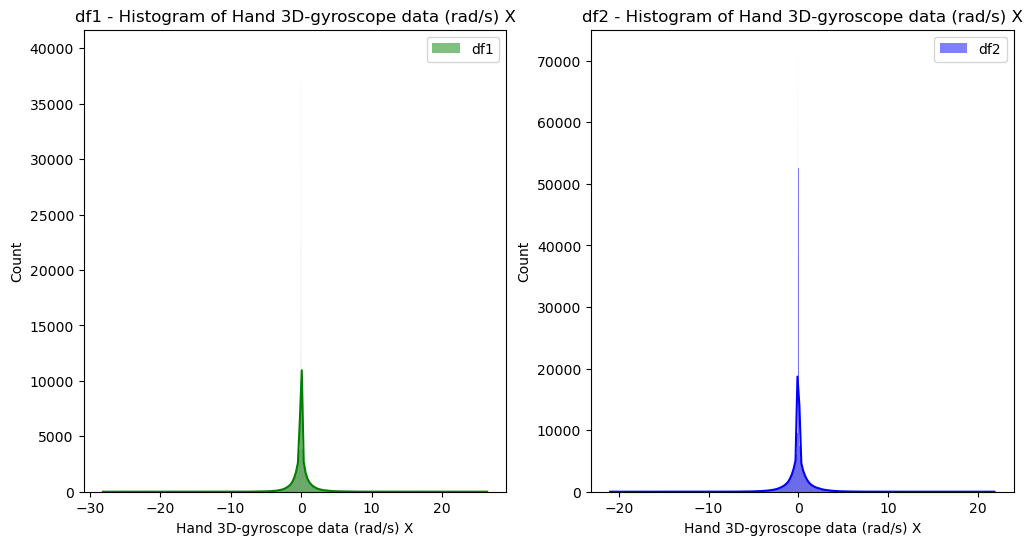

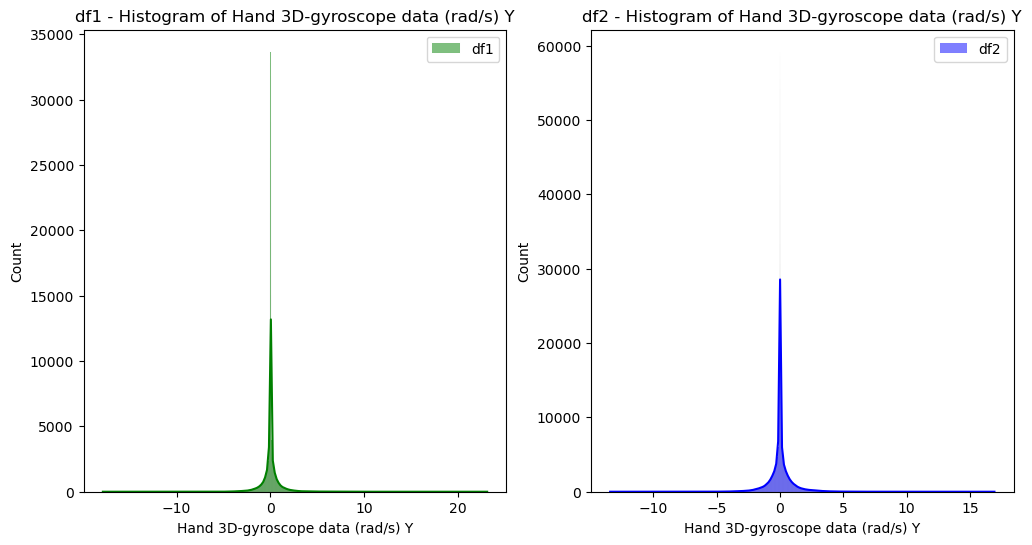

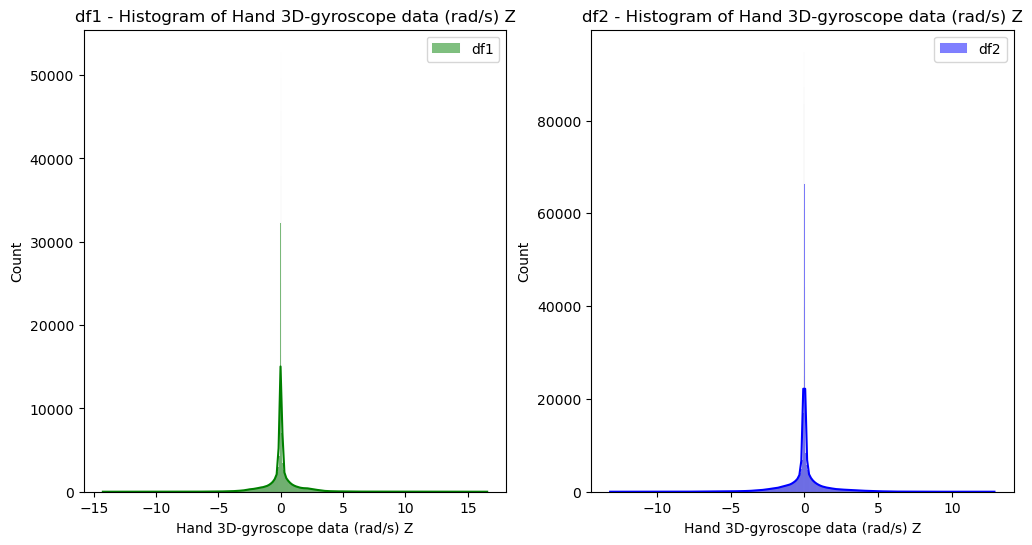

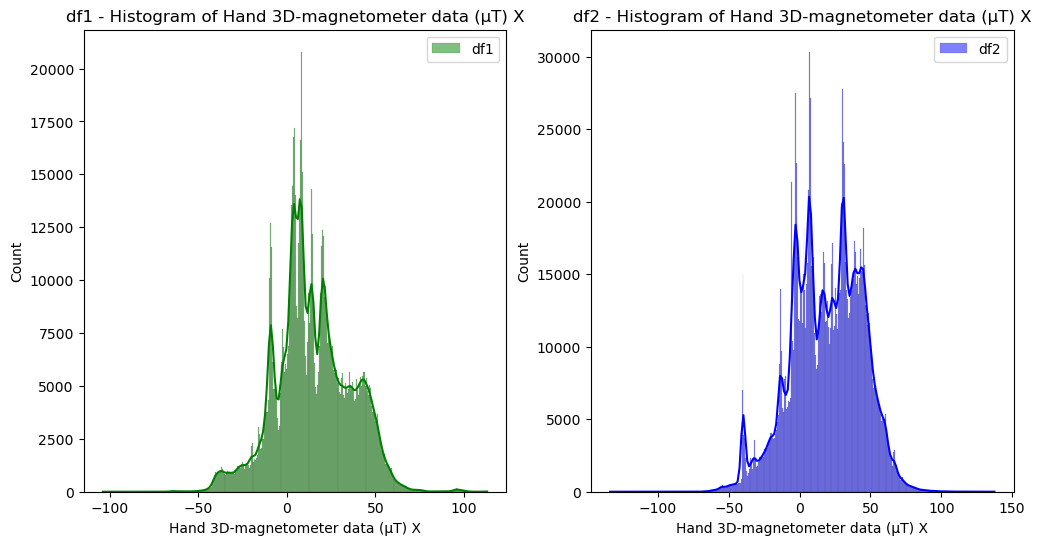

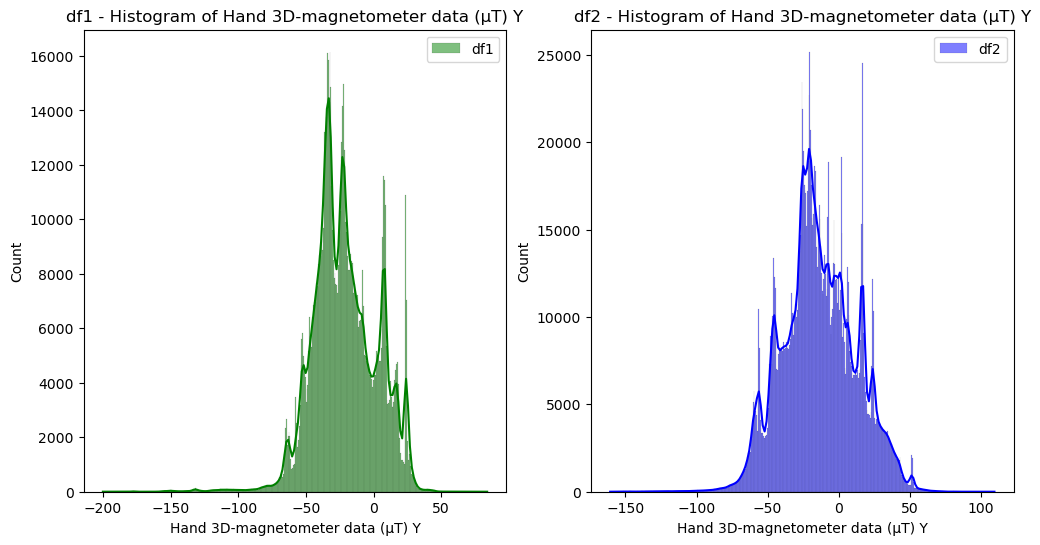

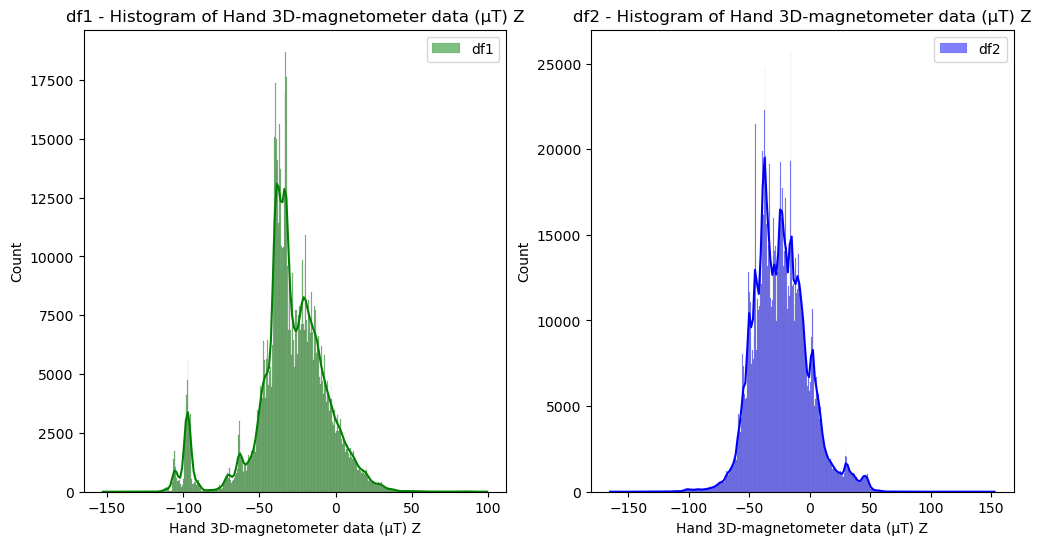

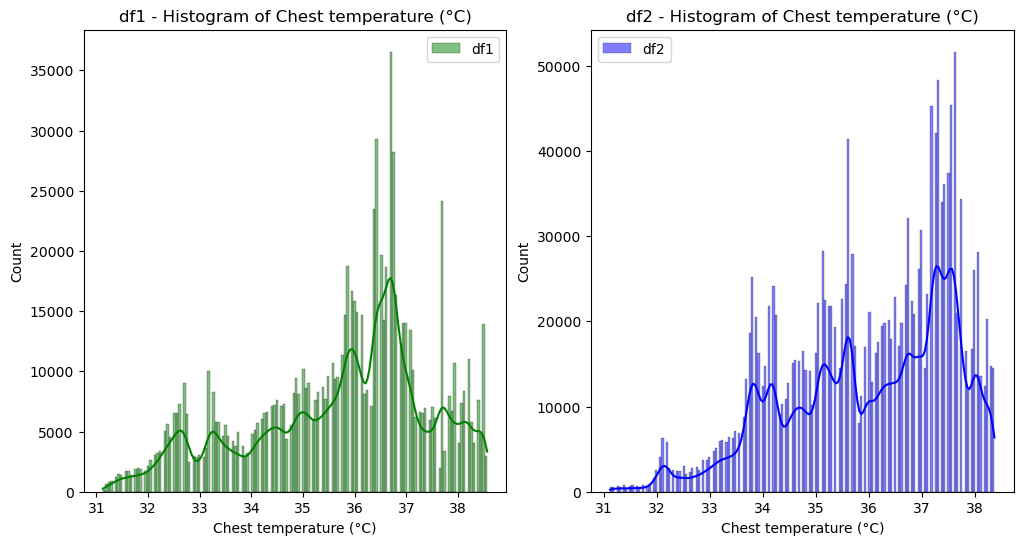

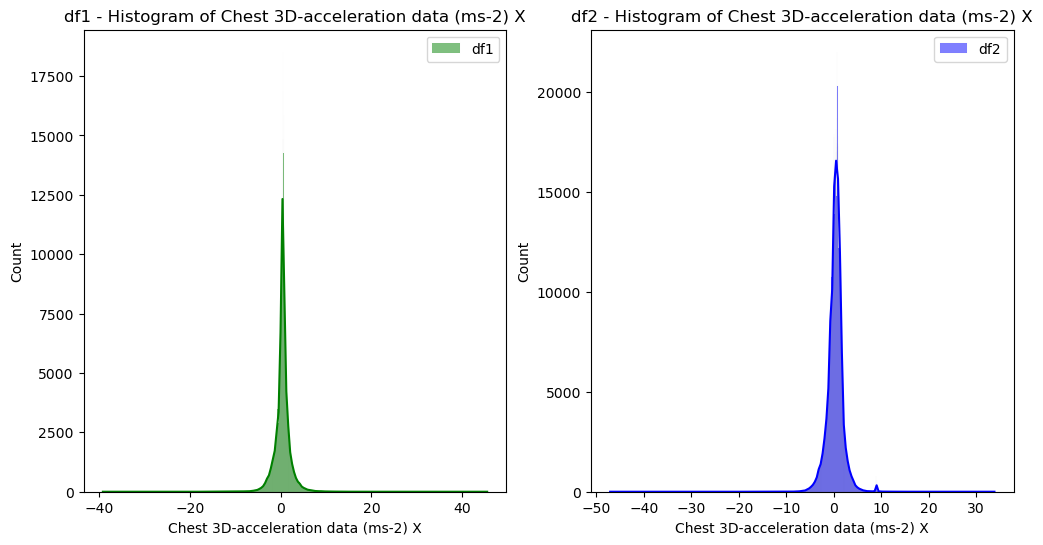

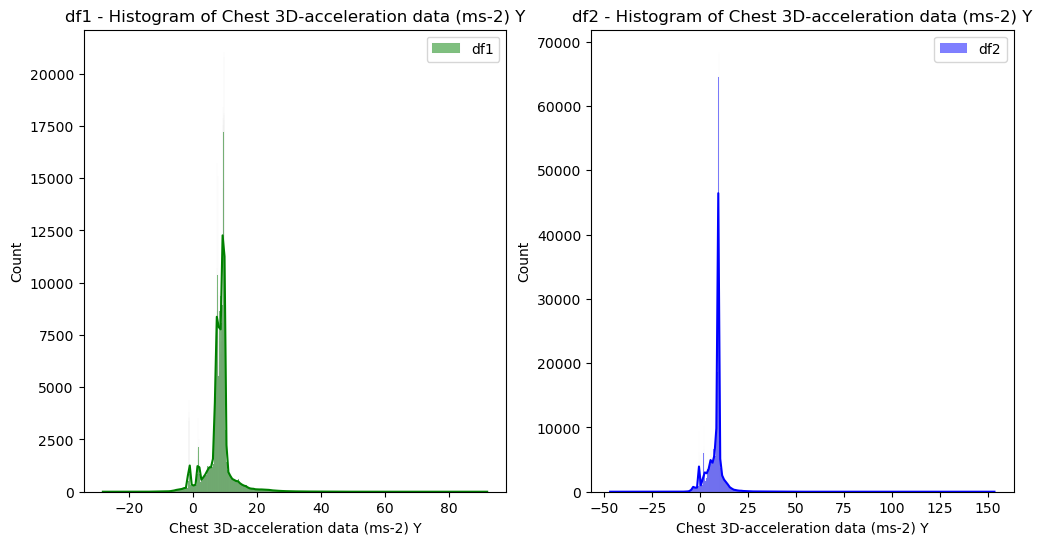

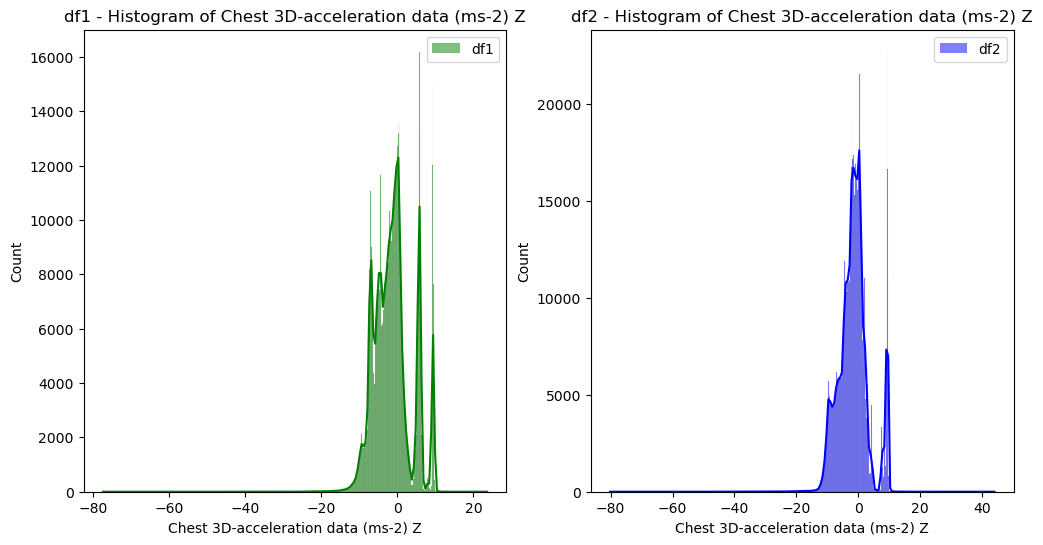

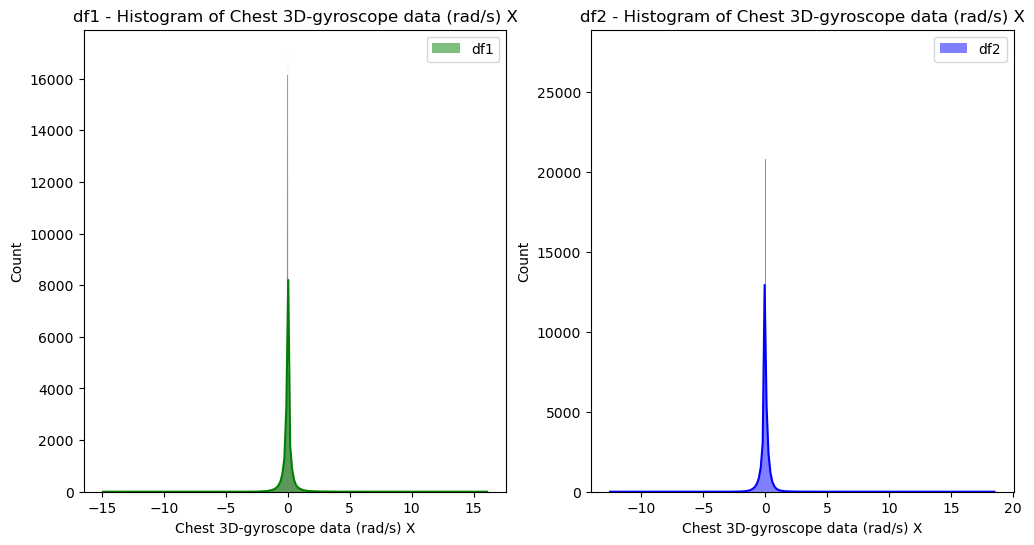

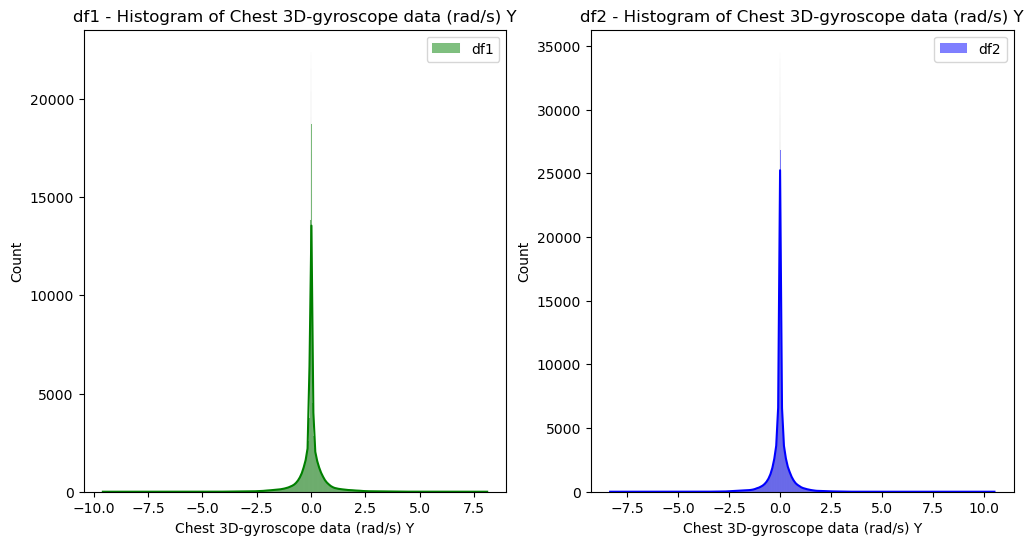

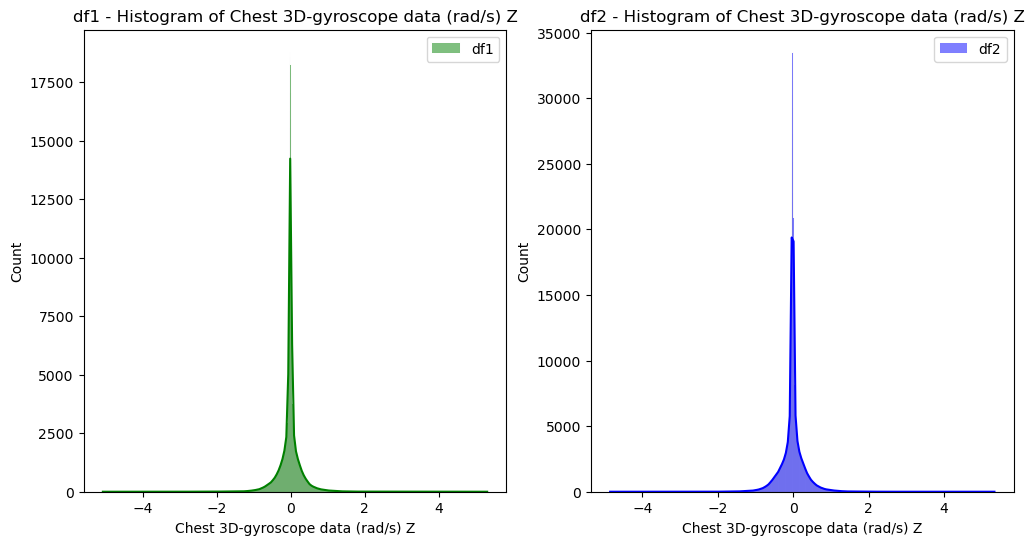

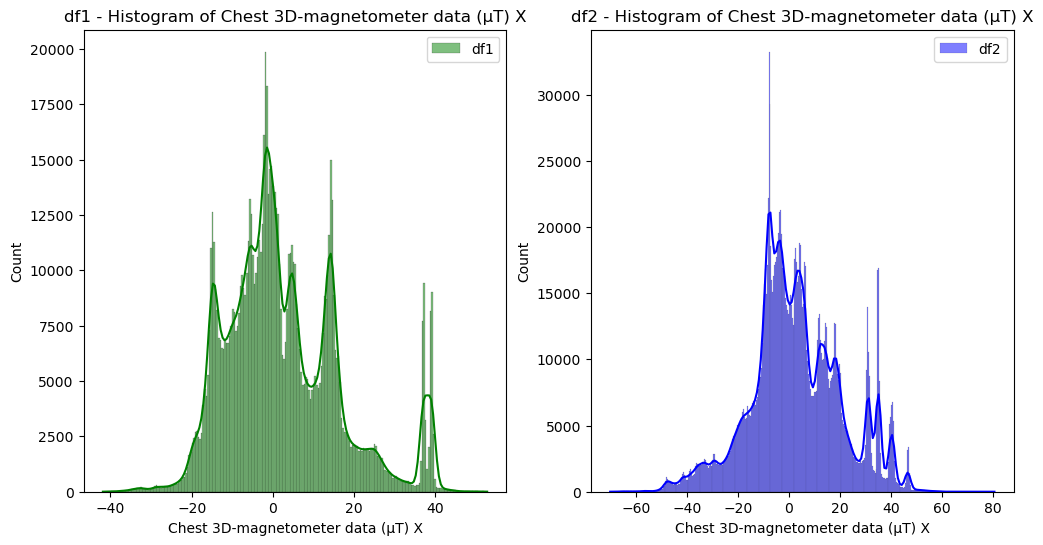

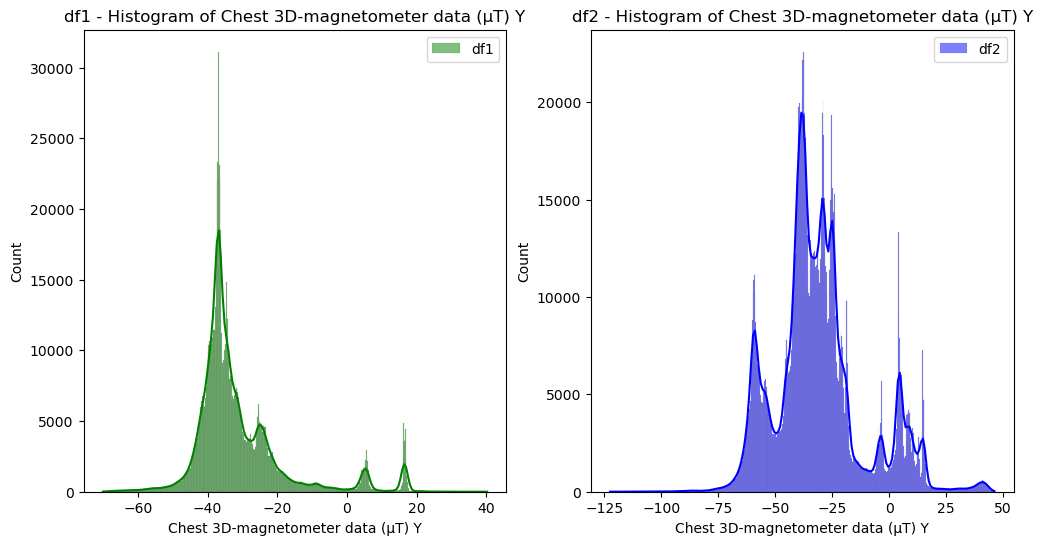

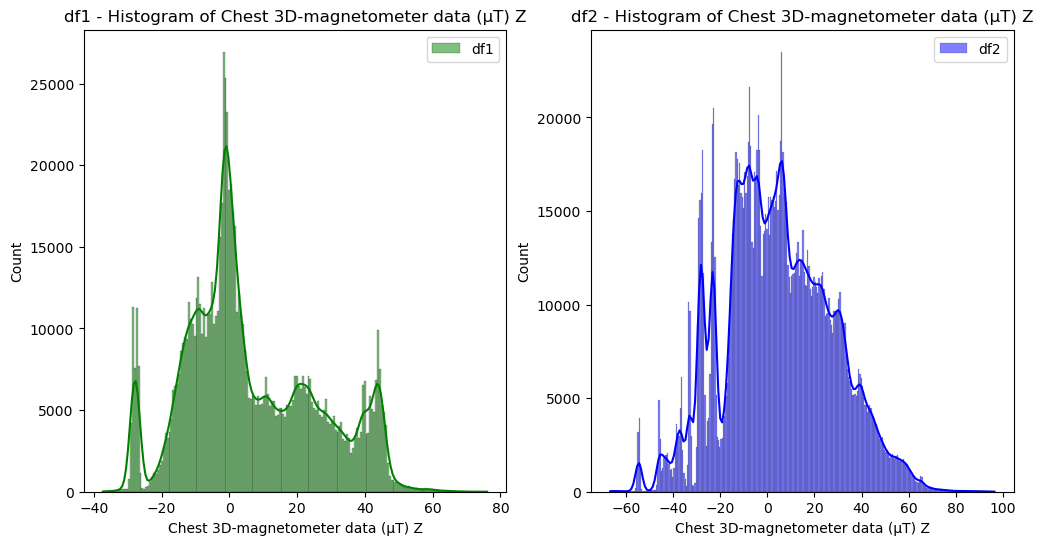

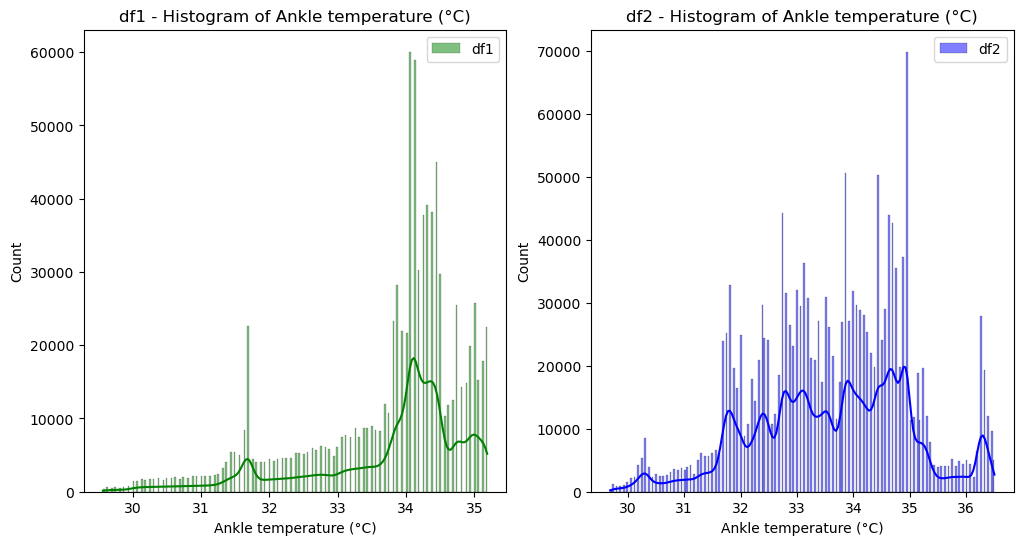

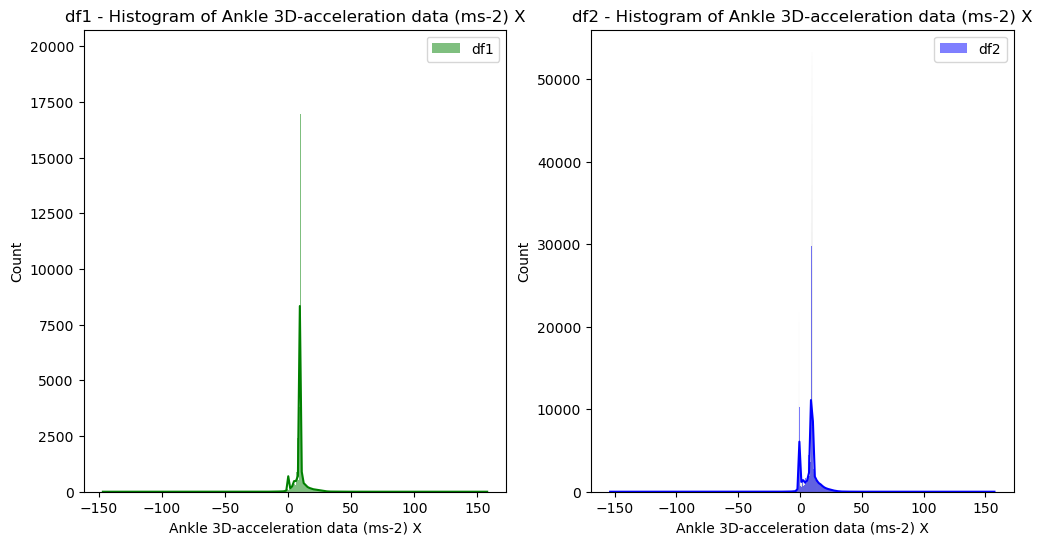

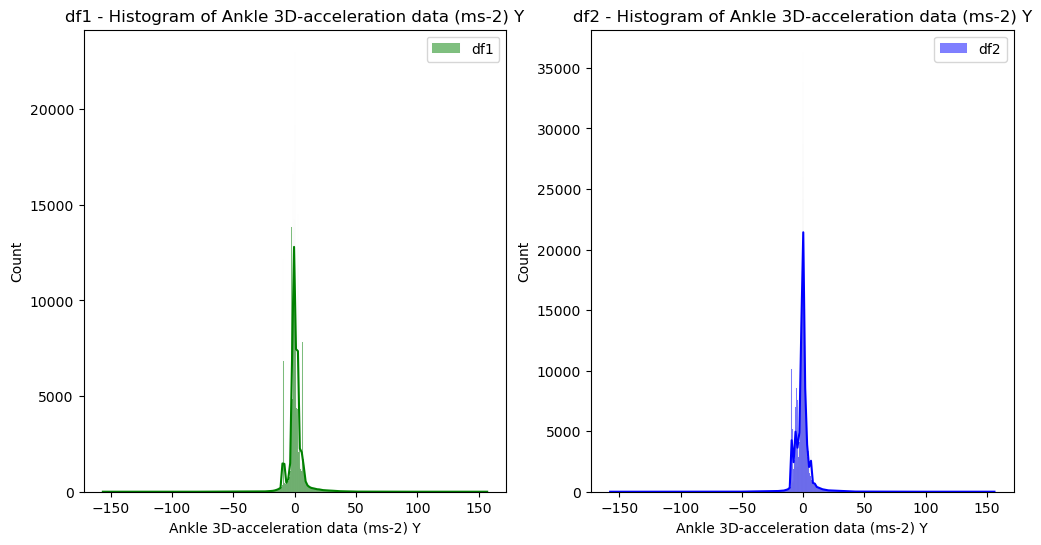

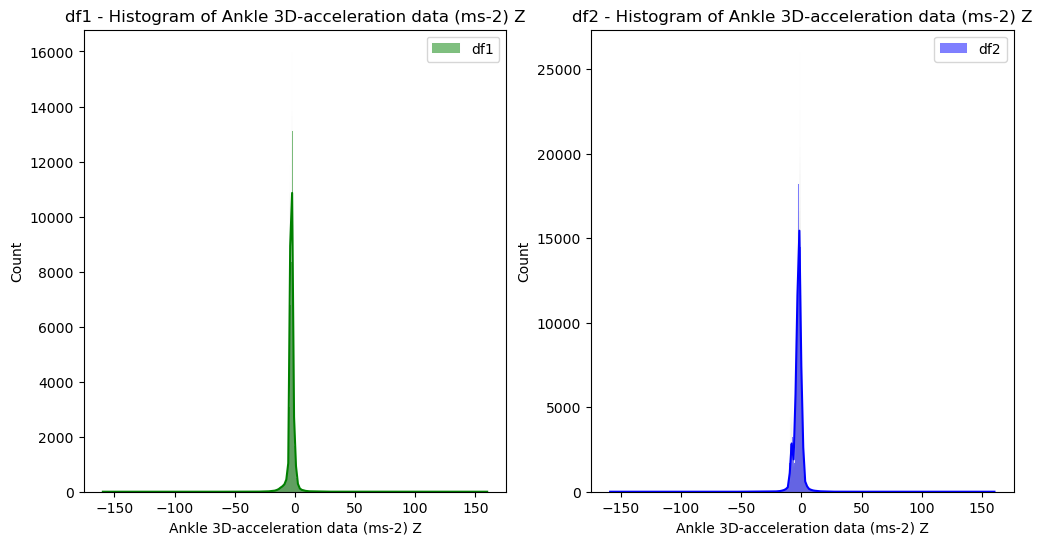

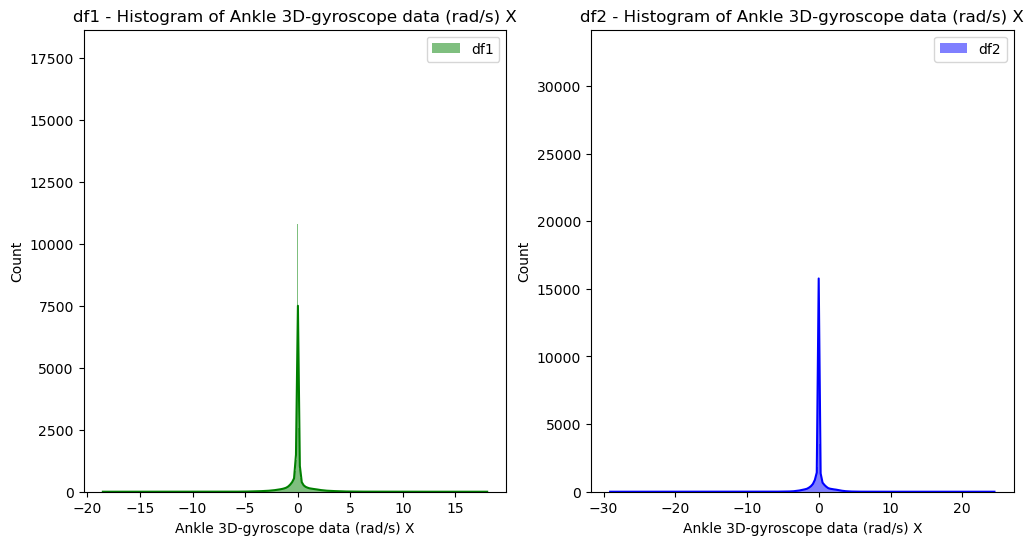

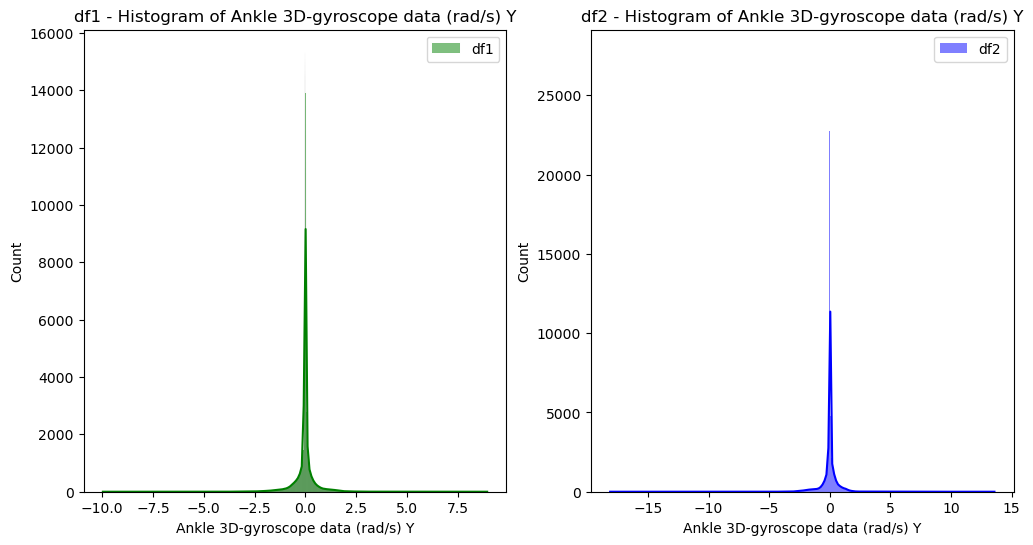

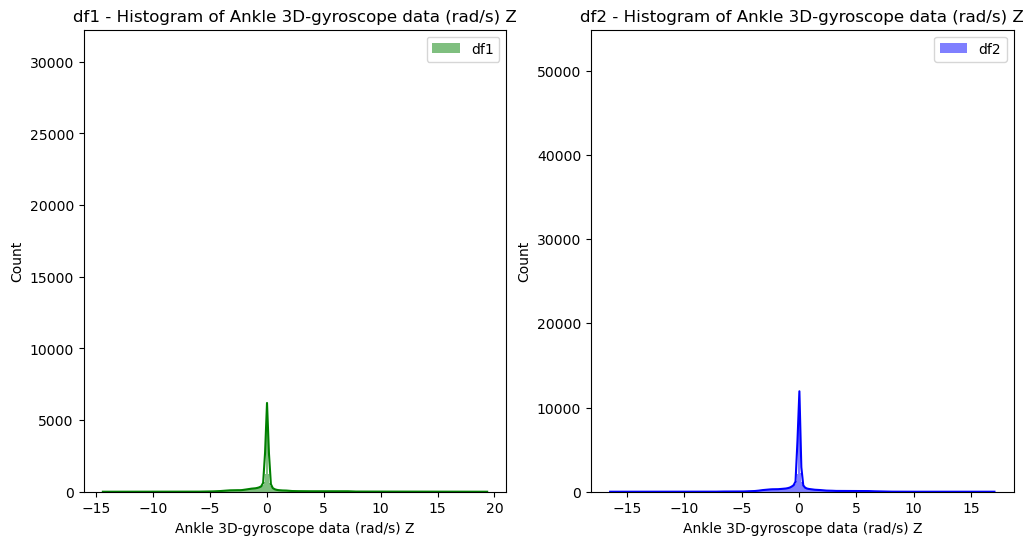

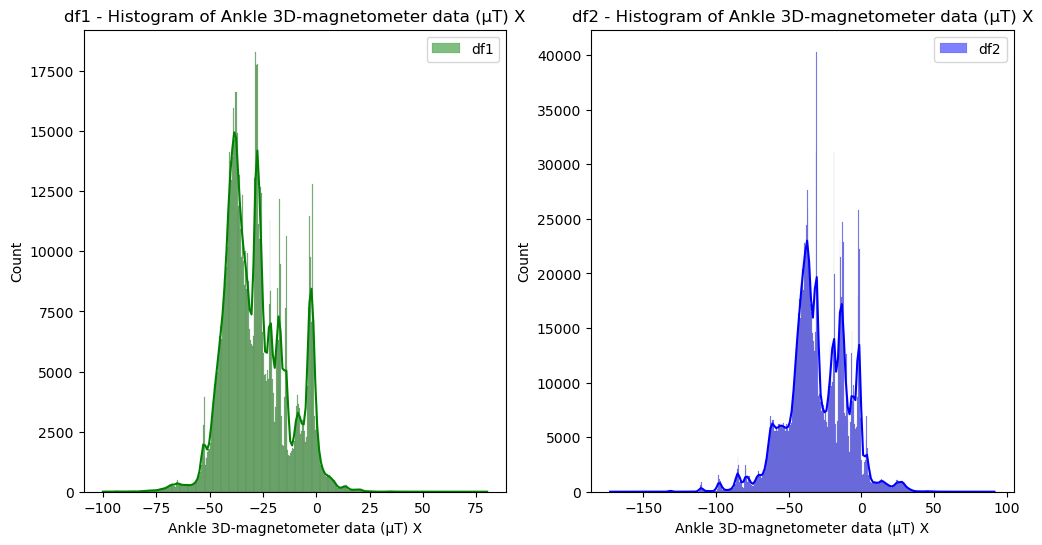

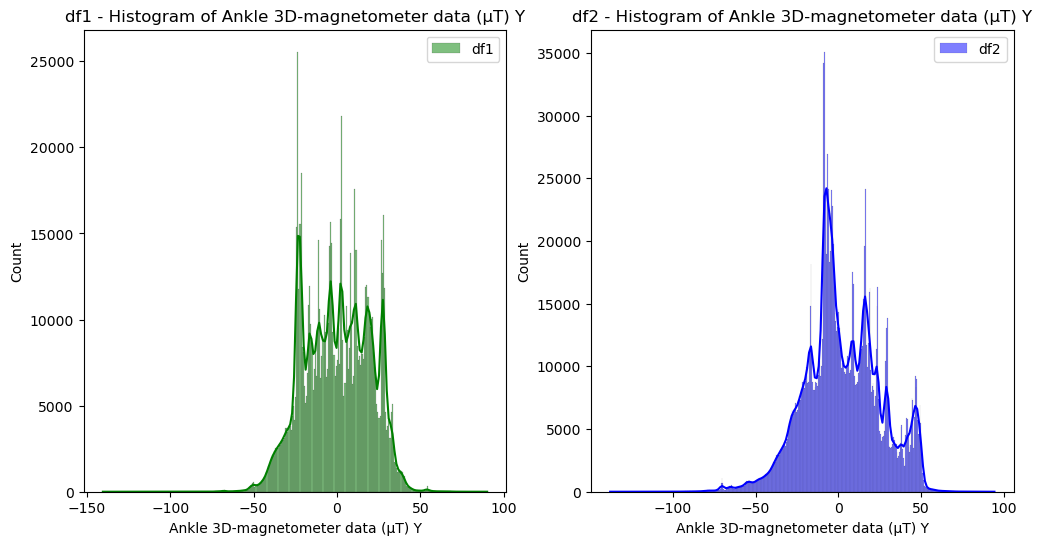

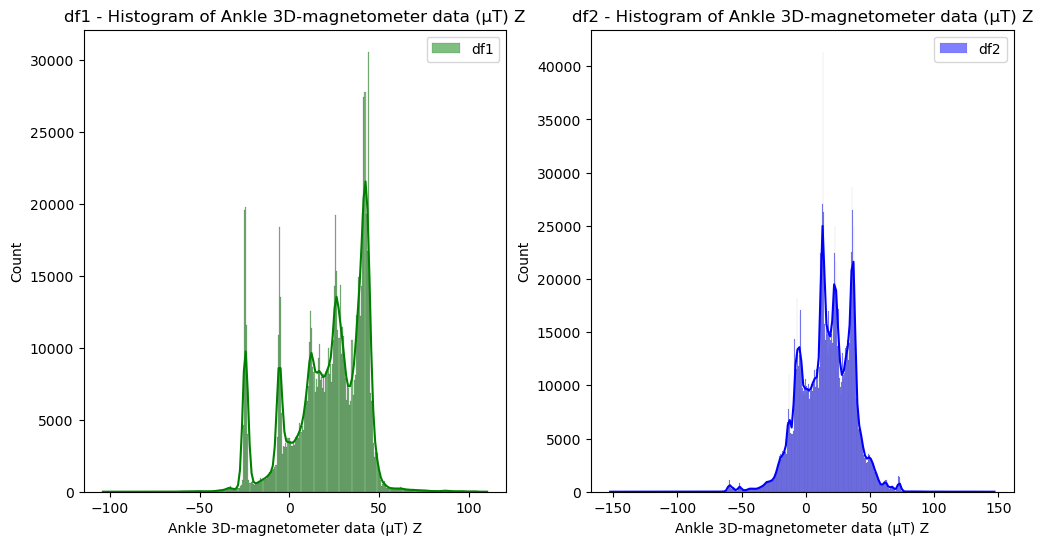

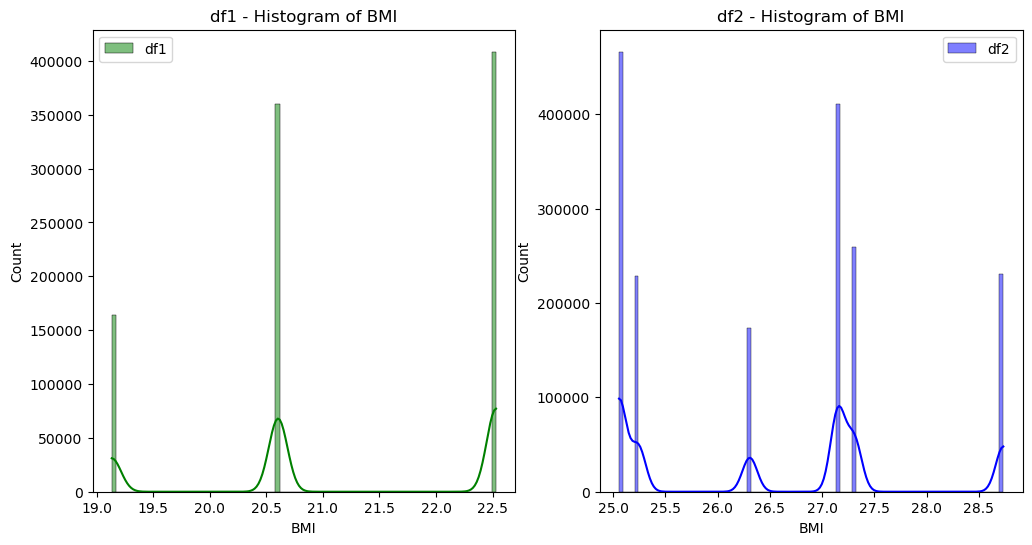

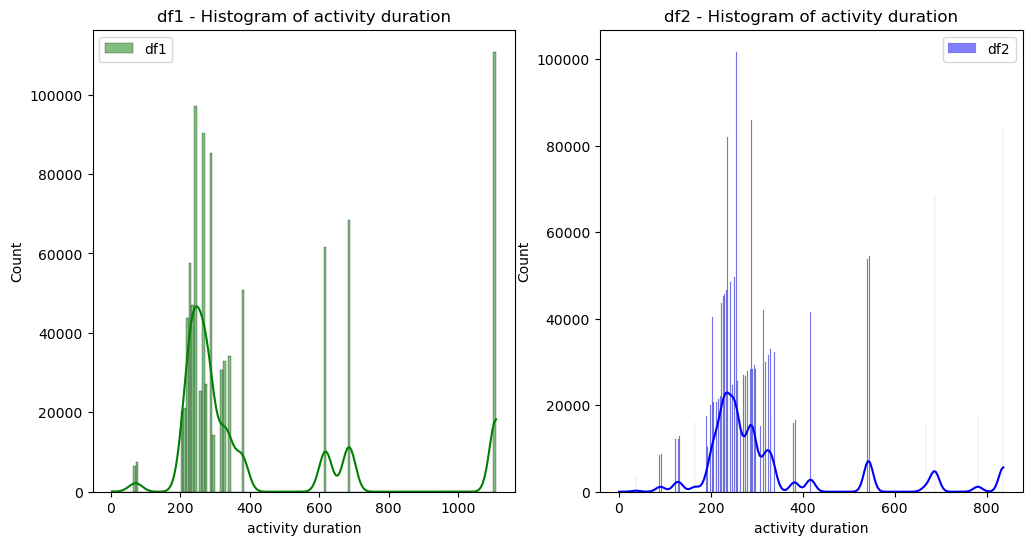

In [24]:
numeric_df1 = df1.select_dtypes(include=[np.number]) 


numeric_df2 = df2.select_dtypes(include=[np.number]) 


for col in numeric_df1.columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_df1[col], kde=True, color='green', label='df1')
    plt.title(f'df1 - Histogram of {col}')
    plt.legend()
              
    plt.subplot(1, 2, 2)
    sns.histplot(numeric_df2[col], kde=True, color='blue', label='df2')
    plt.title(f'df2 - Histogram of {col}')
    plt.legend()
    
    plt.show()


*From the Histograms, none of the data is normally disterputed.*

The direction taken for this study in particular will be investigating BMI and its effects on the Colibri Wireless unit, so all the readings from the devices's sensors will be romoved, and the focus will be on columns that are related to the human body and its characteristics and columns that indicate time. The new DataFrame will be called dfnew:

In [25]:
columns_to_drop = [
    'Hand temperature (°C)','Hand 3D-acceleration data (ms-2) X', 'Hand 3D-acceleration data (ms-2) Y', 'Hand 3D-acceleration data (ms-2) Z',
    'Hand 3D-gyroscope data (rad/s) X', 'Hand 3D-gyroscope data (rad/s) Y', 'Hand 3D-gyroscope data (rad/s) Z',
    'Hand 3D-magnetometer data (μT) X', 'Hand 3D-magnetometer data (μT) Y', 'Hand 3D-magnetometer data (μT) Z',
    'Chest temperature (°C)', 'Chest 3D-acceleration data (ms-2) X', 'Chest 3D-acceleration data (ms-2) Y',
    'Chest 3D-acceleration data (ms-2) Z', 'Chest 3D-gyroscope data (rad/s) X', 'Chest 3D-gyroscope data (rad/s) Y',
    'Chest 3D-gyroscope data (rad/s) Z', 'Chest 3D-magnetometer data (μT) X', 'Chest 3D-magnetometer data (μT) Y',
    'Chest 3D-magnetometer data (μT) Z', 'Ankle temperature (°C)', 'Ankle 3D-acceleration data (ms-2) X',
    'Ankle 3D-acceleration data (ms-2) Y', 'Ankle 3D-acceleration data (ms-2) Z', 'Ankle 3D-gyroscope data (rad/s) X',
    'Ankle 3D-gyroscope data (rad/s) Y', 'Ankle 3D-gyroscope data (rad/s) Z', 'Ankle 3D-magnetometer data (μT) X',
    'Ankle 3D-magnetometer data (μT) Y', 'Ankle 3D-magnetometer data (μT) Z']

dfnew = df.drop(columns=columns_to_drop)

dfnew.head()

,subjectID,gender,age (years),weight (KGs),height (cm),timestamp (s),activityID,heart rate (bpm),BMI,activity duration,weight range
0,101,M,27,83,182,37.66,1,100.0,25.05736,271.86,Overweight
1,101,M,27,83,182,37.67,1,100.0,25.05736,271.86,Overweight
2,101,M,27,83,182,37.68,1,100.0,25.05736,271.86,Overweight
3,101,M,27,83,182,37.69,1,100.0,25.05736,271.86,Overweight
4,101,M,27,83,182,37.70,1,100.0,25.05736,271.86,Overweight


The new DataFrame (dfnew) will be split into 2 called "df1new" and "df2new" to create the Empirical Cumulative Distribution Function (ECDF) plots. This will help visualise and compare the distribution of a particular variable between the two DataFrames:

In [26]:
cols = dfnew.columns
hist_plots = ["heart rate (bpm)","timestamp (s)"]
bar_plots = [c for c in cols if (c not in hist_plots)]

In [27]:
numerical_cols = dfnew.select_dtypes(include=[np.number]).columns
bar_plots = [c for c in numerical_cols if c not in hist_plots]

def plot_ECDF(df_1, df_2, col, label_1, label_2, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    
    values_1 = df_1[df_1[col].notna()][col].values
    values_2 = df_2[df_2[col].notna()][col].values

    if not values_1.size or not values_2.size:
        print(f"Skipping {col}: insufficient data")
        return
    
    if title is None:
        title = col
    
    ECDF_1 = ECDF(values_1)
    ECDF_2 = ECDF(values_2)
    xax = np.linspace(min(np.min(values_1),np.min(values_2)),max(np.max(values_1),np.max(values_2)),1001)
    ax.plot(xax,ECDF_1(xax),label=label_1)
    ax.plot(xax,ECDF_2(xax),label=label_2)
    ax.legend(loc="best")
    
    D = np.max(np.abs(ECDF_2(xax) - ECDF_1(xax)))
    ax.set_title(fr"{title}: $D$ = {D:.4f}")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$\hat{F}_{X}(x)$")

In [28]:
df1new = dfnew[(dfnew['weight range'] == 'Underweight') | (dfnew['weight range'] == 'Healthy')]
df2new = dfnew[(dfnew['weight range'] == 'Overweight') | (dfnew['weight range'] == 'Obese')]

df1new.reset_index(drop=True, inplace=True)
df2new.reset_index(drop=True, inplace=True)

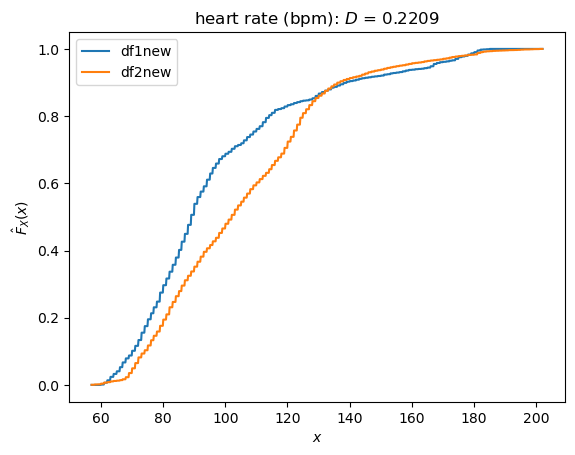

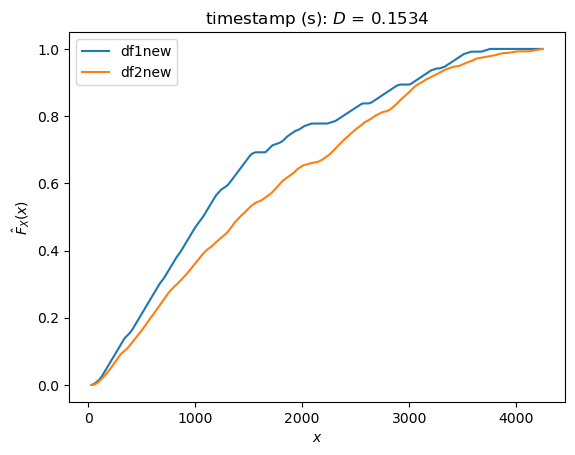

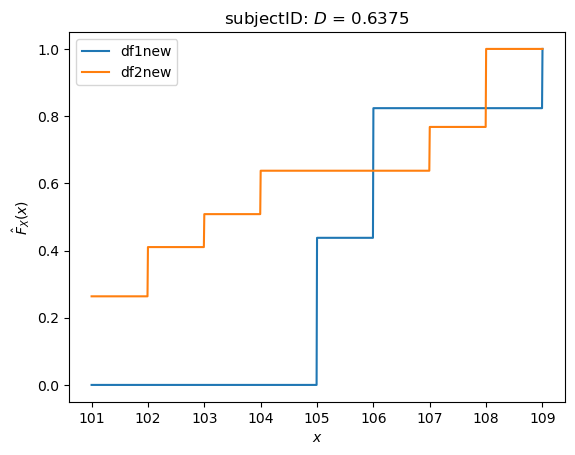

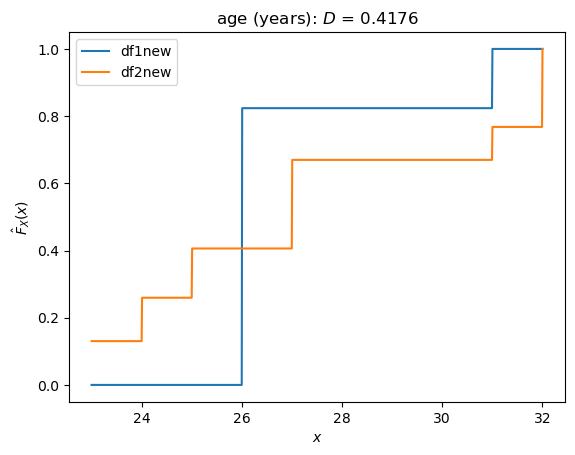

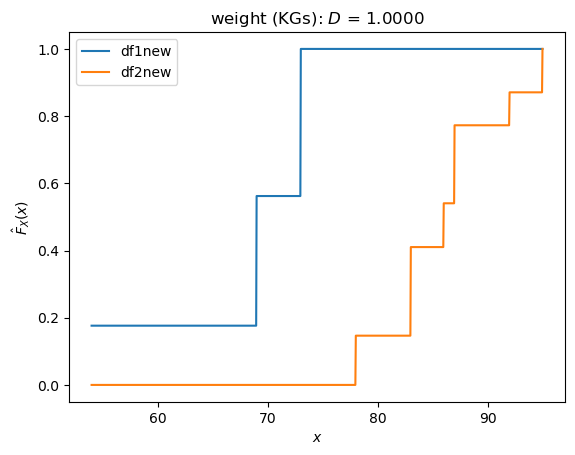

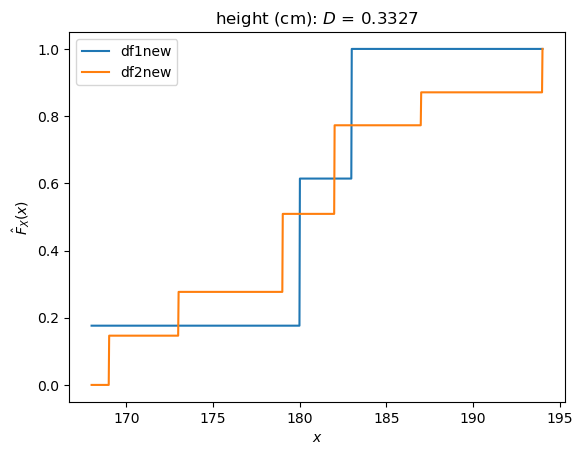

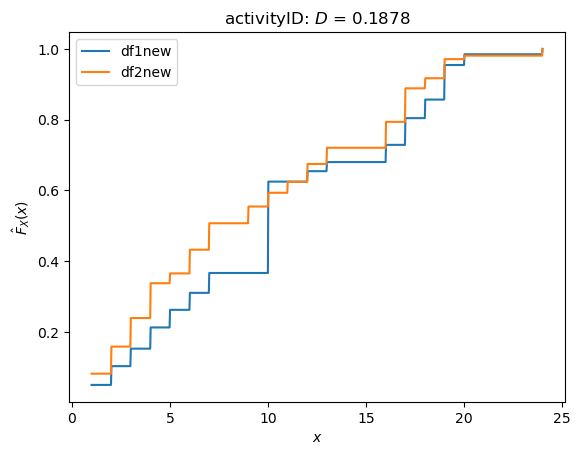

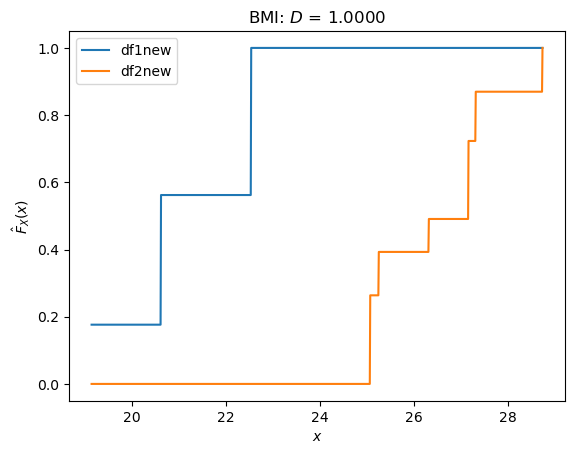

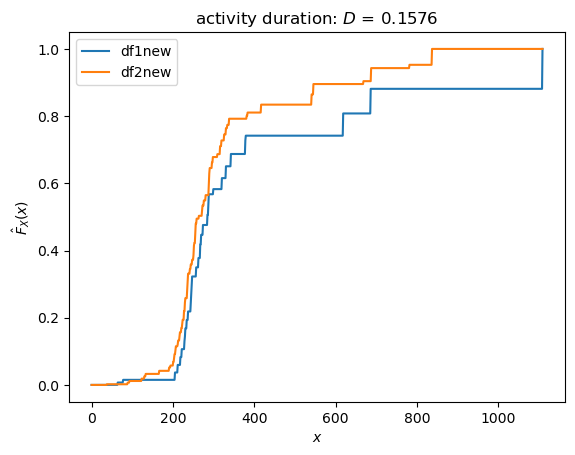

In [29]:
for col in hist_plots + bar_plots:
    plot_ECDF(df1new, df2new, col, "df1new", "df2new")

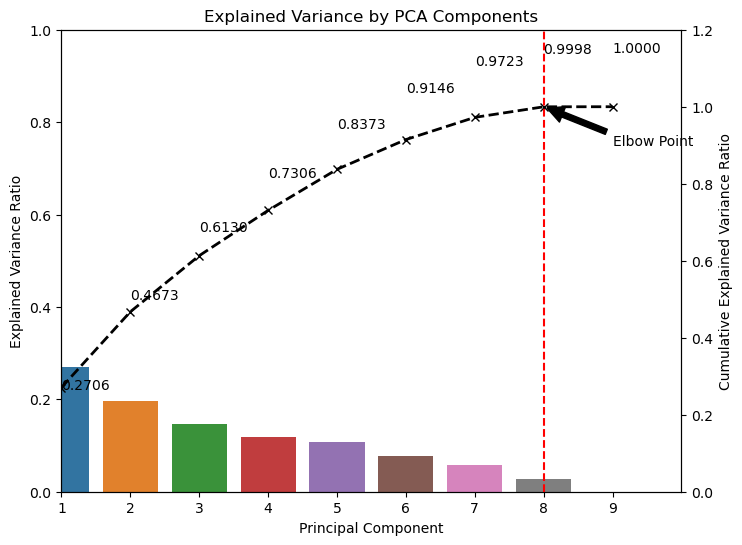

In [30]:
numerical_dfnew = dfnew.select_dtypes(include=[np.number])
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_dfnew)

pca = PCA().fit(numerical_scaled)
ev_ratio = pca.explained_variance_ratio_
cumul_ev_ratio = np.cumsum(ev_ratio)
pcs = np.arange(1, len(ev_ratio) + 1)

# Calculate the gradient of the cumulative explained variance
gradient = np.diff(cumul_ev_ratio)

# Find the elbow point which is the last 'high' gradient before flattening out significantly
elbow_point = np.argmax(gradient < 0.01) if np.any(gradient < 0.01) else len(gradient)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=pcs, y=ev_ratio, ax=ax)
ax2 = ax.twinx()
ax2.plot(pcs-1, cumul_ev_ratio, ls="--", marker="x", lw=2, c="k")

# Annotating the cumulative explained variance
for pc, cer in zip(pcs, cumul_ev_ratio):
    ax.annotate(f"{cer:.4f}", xy=(pc - 1, cer - 0.05))

# Highlight the elbow point
ax2.axvline(x=elbow_point, color='red', linestyle='--', linewidth=1.5)
ax2.annotate('Elbow Point', xy=(elbow_point, cumul_ev_ratio[elbow_point]), xytext=(elbow_point+1, cumul_ev_ratio[elbow_point]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_xlim(0, len(pcs))
ax.set_ylim(0, 1)
ax2.set_ylim(0, 1.2)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance Ratio")
ax2.set_ylabel("Cumulative Explained Variance Ratio")
ax.set_title("Explained Variance by PCA Components")

plt.show()

*The first three components are the most significant in explaining the variance in the dataset, as collectively they explain over 60%, and to explain over 90% of the variance, six components will be needed.*

Considering the first PCA explains the most variance in the dataset, the most significant features will be calculated for it through Principal Component Analysis:

In [31]:
loadings_dfnew = pd.DataFrame(pca.components_, columns=numerical_dfnew.columns)
first_component_loadings = loadings_dfnew.iloc[0].abs().sort_values(ascending=False)
print('The most significant features for the first PCA component:')
print(first_component_loadings.head())

The most significant features for the first PCA component:
weight (KGs)        0.514801
BMI                 0.427715
heart rate (bpm)    0.346158
timestamp (s)       0.339288
subjectID           0.335754
Name: 0, dtype: float64


*The features "weight (KGs)" and "BMI" have the highest absolute loading values for the first PCA component. This suggests that they contribute the most to the variance explained by the first principal component. But BMI and weight are related, which is why both have high loadings on the same principal component.*

Regression will be used to determine the optimal number of features based on the AIC (Akaike Information Criterion) for BMI as the target variable, and it will visualise how AIC changes as the number of features is varied:

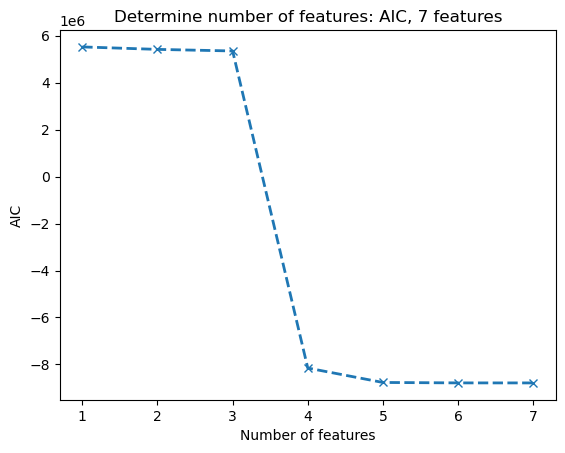

In [32]:
y = numerical_dfnew['BMI']
X = numerical_dfnew.drop(columns=['BMI'])

AIC = np.zeros(len(X.columns) - 1) 

lm = LinearRegression()
num_features = np.arange(1, len(X.columns))

sfs_features = {}

for nf in num_features:
    sfs = SequentialFeatureSelector(lm, n_features_to_select=nf).fit(X, y)
    features = sfs.get_support()
    new_X = X.iloc[:, features]
    nf_lm = lm.fit(new_X, y)
    y_pred = nf_lm.predict(new_X)
    mse = mean_squared_error(y, y_pred)
    AIC[nf - 1] = len(y) * np.log(mse) + 2 * nf
    sfs_features[nf] = {"score": nf_lm.score(new_X, y), "features": features, "model": nf_lm}

aic_features = np.argmin(AIC) + 1  
fig, ax = plt.subplots() 

ax.set_xlabel("Number of features")
ax.set_ylabel("AIC")
ax.set_title(f"Determine number of features: AIC, {aic_features} features")
ax.plot(num_features, AIC, ls="--", lw=2, marker="x")
plt.show()

In [33]:
best_features = X.columns[sfs_features[aic_features]['features']]

X_best = X.loc[:, best_features]

X_best_with_constant = sm.add_constant(X_best) 
ols_model = sm.OLS(y, X_best_with_constant) 

ols_results = ols_model.fit()

ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.953e+07
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:46:46   Log-Likelihood:             5.6092e+05
No. Observations:             2701010   AIC:                        -1.122e+06
Df Residuals:                 2701002   BIC:                        -1.122e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.7253      0.007   7488.678      0.000      51.712      51.739
subjectID            -0.0004   5.34e-05     -7.040      0.000      -0.000      -0.000
age (years)          -0.0360   4.49e-05   -802.161      0.000      -0.036      -0.036
weight (KGs)          0.3198   1.44e-05   2.21e+04      0.000       0.320       0.320
height (cm)          -0.2867   2.07e-05  -1.38e+04      0.000      -0.287      -0.287
activityID           -0.0028   2.03e-05   -138.736      0.000      -0.003      -0.003
heart rate (bpm)      0.0002   4.82e-06     32.319      0.000       0.000       0.000
activity duration   1.25e-06   5.82e-07      2.148      0.032    1.09e-07    2.39e-06
==============================================================================
Omnibus:                   422193.919   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           661873.843
Skew:                          -1.105   Prob(JB):                         0.00
Kurtosis:                       3.998   Cond. No.                     2.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*The R-squared and R-squared adjusted values of 0.995 suggest that the model explains almost all the variability in BMI, and considering that there is no visible increase in AIC for the range of features shown, it suggests that overfitting has not occurred.*

In [34]:
X = dfnew[best_features]  
y = dfnew['BMI'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True) 

ln = LinearRegression() 
ln.fit(X_train, y_train)

y_pred = ln.predict(X_test) 

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"R-squared Score on Test Set: {r2}")

coeficientes_modelo = dict(zip(best_features, ln.coef_)) 

print("Feature Coefficients in the Best Model:")
coeficientes_df = pd.DataFrame(list(coeficientes_modelo.items()), columns=['Feature', 'Coefficient'])
print(coeficientes_df)

Mean Squared Error (MSE) on Test Set: 0.03861098141819979
R-squared Score on Test Set: 0.9951778262418361
Feature Coefficients in the Best Model:
             Feature  Coefficient
0          subjectID    -0.000368
1        age (years)    -0.035987
2       weight (KGs)     0.319832
3        height (cm)    -0.286719
4         activityID    -0.002843
5   heart rate (bpm)     0.000157
6  activity duration     0.000001


The MSE on the test set is very low. This represents the average squared difference between the observed actual outturn values and the values predicted by the model. The smaller the MSE, the closer the fit is to the actual data. In this context, a low MSE suggests that the model's predictions are very close to the actual BMI values in the test set. 
Considering that the coefficients for subjectID, heart rate (bpm), activity duration are very small, they suggests negligible effect on BMI unlike weight (KGs) were the positive coefficient indicates that as weight increases, BMI increases, and in height (cm) were the negative coefficient suggests that BMI decreases as height increases.
Since age has a negative association with BMI, future policies may need to account for changes in BMI as populations age, perhaps focusing on maintaining muscle mass and addressing metabolic slow-down.

Another linear regression model will be used to determine the optimal number of features based on the AIC (Akaike Information Criterion) for heart rate (bpm) as the target variable, and it will visualise how AIC changes as the number of features is varied:

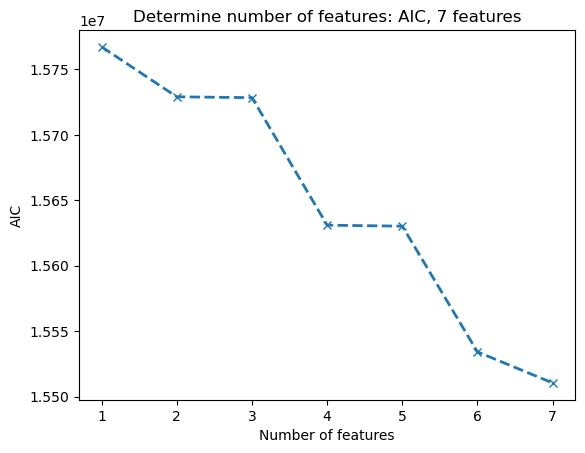

In [38]:
y = numerical_dfnew['heart rate (bpm)']
X = numerical_dfnew.drop(columns=['heart rate (bpm)'])

AIC = np.zeros(len(X.columns) - 1) 


lm = LinearRegression()
num_features = np.arange(1, len(X.columns))

sfs_features = {}

for nf in num_features:
    sfs = SequentialFeatureSelector(lm, n_features_to_select=nf).fit(X, y)
    features = sfs.get_support()
    new_X = X.iloc[:, features]
    nf_lm = lm.fit(new_X, y)
    y_pred = nf_lm.predict(new_X)
    mse = mean_squared_error(y, y_pred)
    AIC[nf - 1] = len(y) * np.log(mse) + 2 * nf
    sfs_features[nf] = {"score": nf_lm.score(new_X, y), "features": features, "model": nf_lm}

aic_features = np.argmin(AIC) + 1 
fig, ax = plt.subplots() 
ax.set_xlabel("Number of features")
ax.set_ylabel("AIC")
ax.set_title(f"Determine number of features: AIC, {aic_features} features")
ax.plot(num_features, AIC, ls="--", lw=2, marker="x")
plt.show()

In [39]:
best_features = X.columns[sfs_features[aic_features]['features']] 
X_best = X.loc[:, best_features]

X_best_with_constant = sm.add_constant(X_best) 

ols_model = sm.OLS(y, X_best_with_constant) 
ols_results = ols_model.fit()

ols_results.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       heart rate (bpm)   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                 5.380e+05
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:50:50   Log-Likelihood:            -1.1588e+07
No. Observations:             2701010   AIC:                         2.318e+07
Df Residuals:                 2701002   BIC:                         2.318e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                93.3491      0.620    150.541      0.000      92.134      94.564
subjectID            -0.7377      0.005   -154.285      0.000      -0.747      -0.728
age (years)           0.3379      0.004     83.719      0.000       0.330       0.346
weight (KGs)         -0.0102      0.001     -7.878      0.000      -0.013      -0.008
height (cm)           0.2841      0.002    151.690      0.000       0.280       0.288
timestamp (s)         0.0180   1.11e-05   1622.635      0.000       0.018       0.018
activityID            0.5986      0.002    335.098      0.000       0.595       0.602
activity duration    -0.0171   5.13e-05   -332.488      0.000      -0.017      -0.017
==============================================================================
Omnibus:                   668756.052   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1766912.735
Skew:                           1.338   Prob(JB):                         0.00
Kurtosis:                       5.923   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*The R-squared and R-squared adjusted values of the model are approximately 0.582, indicating that around 58% of the variance in heart rate can be explained by the selected variables. This suggests a moderate fit of the model, meaning that while the included features do provide significant information about heart rate, there is still a portion of variability that is not captured by the model.*

In [40]:
X = dfnew[best_features]  
y = dfnew['heart rate (bpm)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True) 

ln = LinearRegression() 

ln.fit(X_train, y_train)

y_pred = ln.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"R-squared Score on Test Set: {r2}")

coeficientes_modelo = dict(zip(best_features, ln.coef_)) 
print("Feature Coefficients in the Best Model:")
coeficientes_df = pd.DataFrame(list(coeficientes_modelo.items()), columns=['Feature', 'Coefficient'])
print(coeficientes_df)

Mean Squared Error (MSE) on Test Set: 312.1294586751031
R-squared Score on Test Set: 0.5825890768678368
Feature Coefficients in the Best Model:
             Feature  Coefficient
0          subjectID    -0.737619
1        age (years)     0.337394
2       weight (KGs)    -0.010617
3        height (cm)     0.284248
4      timestamp (s)     0.017984
5         activityID     0.598491
6  activity duration    -0.017035


*Age and height have a positive relationship with heart rate, indicating that as age and height increase, so does the heart rate.
Weight on the other hand, has a negative relationship with heart rate, suggesting that an increase in weight is associated with a decrease in heart rate.
The mean squared error (MSE) of the model on the test set is quite high, which might suggest that the model's predictions are not very close to the actual values.
In conclusion, while the model identifies some relationships between the predictors and heart rate, the predictive power is moderate.*